# Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None

pd.options.display.max_rows = None
   
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE

# Read the dataset

In [4]:
df = pd.read_csv("C:\\Users\\justi\\Downloads\\Loan Flag new.csv")

# display the first five observations
df.head()

Id            Income  Age  Experience Married/Single House_Ownership  \
0   17   ? 73,15,840.00    71           8        married          rented   
1   35   ? 90,86,933.00    55           7         single          rented   
2   68   ? 95,76,258.00    79          18         single          rented   
3   72   ? 32,08,322.00    55          18         single          rented   
4  145   ? 39,70,273.00    53          14         single          rented   

  Car_Ownership Dependents              Profession        CITY  \
0            no        Nan  Air_traffic_controller   Kamarhati   
1            no          4  Air_traffic_controller  Saharanpur   
2           yes        NaN  Air_traffic_controller  Jamshedpur   
3            no          4  Air_traffic_controller    Kottayam   
4            no        NaN  Air_traffic_controller       Satna   

            STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  
0     West_Bengal                8                 14          0  
1   Uttar_Pradesh                7                 13          0  
2       Jharkhand                6                 11          0  
3          Kerala                8                 12          0  
4  Madhya_Pradesh                4                 12          0

# Data Preprocessing

###  Basic Info

In [8]:
# basic information

In [10]:
df.shape

(252000, 14)

In [12]:
# data types

In [14]:
df.dtypes

Id                    int64
Income               object
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Dependents           object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [16]:
# here we can see that datatype of income is object and it should be of float type

In [18]:
df['Income'].head()

0     ? 73,15,840.00 
1     ? 90,86,933.00 
2     ? 95,76,258.00 
3     ? 32,08,322.00 
4     ? 39,70,273.00 
Name: Income, dtype: object

In [20]:
# removing impuriries from income

In [22]:
df['Income']=df['Income'].str.replace('?','')
df['Income']=df['Income'].str.replace(' ','')
df['Income']=df['Income'].str.replace(',','')

In [23]:
df['Income'].head()

0    7315840.00
1    9086933.00
2    9576258.00
3    3208322.00
4    3970273.00
Name: Income, dtype: object

In [26]:
# change the datatype to float

In [28]:
df['Income']=df['Income'].astype(float)

In [30]:
df['Income'].dtype

dtype('float64')

### Remove Insignificant variable

In [33]:
# here we can see , since id is not necessary for numerical computation ,we consider to drop it  

In [35]:
df=df.drop(['Id'],axis=1)

In [37]:
df.describe()

Income           Age    Experience  CURRENT_JOB_YRS  \
count  252000.000000 252000.000000 252000.000000    252000.000000   
mean  4997015.868183     49.964274     10.084861         6.333861   
std   2878301.063003     17.202752      6.002869         3.647050   
min     10310.000000     21.000000      0.000000         0.000000   
25%   2503015.000000     35.000000      5.000000         3.000000   
50%   5000574.000000     50.000000     10.000000         6.000000   
75%   7477502.000000     65.000000     15.000000         9.000000   
max   9999938.000000    730.000000     27.000000        14.000000   

       CURRENT_HOUSE_YRS     Risk_Flag  
count      252000.000000 252000.000000  
mean           11.997794      0.123000  
std             1.399037      0.328438  
min            10.000000      0.000000  
25%            11.000000      0.000000  
50%            12.000000      0.000000  
75%            13.000000      0.000000  
max            14.000000      1.000000

### Duplicate Values

In [40]:
df[df.index.duplicated()]

Empty DataFrame
Columns: [Income, Age, Experience, Married/Single, House_Ownership, Car_Ownership, Dependents, Profession, CITY, STATE, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, Risk_Flag]
Index: []

In [42]:
#  duplicates values are not detected

### Null values

In [45]:
null_value=df.isnull().sum()

In [47]:
percentage =null_value/len(df)*100

In [49]:
null_df=pd.concat([null_value,percentage], axis=1,keys=['null_value','percentage'])
null_df

null_value  percentage
Income                      0    0.000000
Age                         0    0.000000
Experience                  0    0.000000
Married/Single              0    0.000000
House_Ownership             0    0.000000
Car_Ownership               0    0.000000
Dependents             251150   99.662698
Profession                  0    0.000000
CITY                        0    0.000000
STATE                       0    0.000000
CURRENT_JOB_YRS             0    0.000000
CURRENT_HOUSE_YRS           0    0.000000
Risk_Flag                   0    0.000000

In [51]:
# only dependents column has 99% duplicate values , so we choose to drop it

In [53]:
df.drop('Dependents',inplace= True,axis=1)

### Processing of Categorical variables

In [56]:
df_cat=df.select_dtypes(include=object) 

In [58]:
for i in df_cat.columns:
    val_count=df[i].value_counts()
    print(val_count,'\n')

Married/Single
single     226233
married     25615
M             113
S              39
Name: count, dtype: int64 

House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64 

Car_Ownership
no     175937
yes     75979
No         63
Y          16
YES         5
Name: count, dtype: int64 

Profession
Surgeon                       14745
Engineer                      10317
Chemical_engineer             10246
Computer_operator              9851
Technician                     9492
Designer                       9356
Lawyer                         9206
Analyst                        8644
Physician                      6977
Economist                      6696
Design_Engineer                6622
Computer_hardware_engineer     6302
Statistician                   5806
Biomedical_Engineer            5671
Industrial_Engineer            5440
Psychologist                   5390
Magistrate                     5357
Fashion_Designer               5304
C

In [60]:
# removing impurities from categorical variables

In [62]:
df['Married/Single'].replace(['M','S'],['married','single'],inplace=True)

In [64]:
df['Car_Ownership'].replace(['No','Y','YES'],['no','yes','yes'],inplace=True)

In [66]:
df['STATE'].replace(['Uttar_Pradesh[5]'],['Uttar_Pradesh'],inplace=True)

In [68]:
for i in df_cat.columns:
    val_count=df[i].value_counts()
    print(val_count,'\n')

Married/Single
single     226272
married     25728
Name: count, dtype: int64 

House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64 

Car_Ownership
no     176000
yes     76000
Name: count, dtype: int64 

Profession
Surgeon                       14745
Engineer                      10317
Chemical_engineer             10246
Computer_operator              9851
Technician                     9492
Designer                       9356
Lawyer                         9206
Analyst                        8644
Physician                      6977
Economist                      6696
Design_Engineer                6622
Computer_hardware_engineer     6302
Statistician                   5806
Biomedical_Engineer            5671
Industrial_Engineer            5440
Psychologist                   5390
Magistrate                     5357
Fashion_Designer               5304
Consultant                     5221
Mechanical_engineer            5217
Hotel_M

### Outliers Treatment

In [71]:
df_num=df.select_dtypes('number')
df_num.head()

Income  Age  Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0 7315840.000000   71           8                8                 14   
1 9086933.000000   55           7                7                 13   
2 9576258.000000   79          18                6                 11   
3 3208322.000000   55          18                8                 12   
4 3970273.000000   53          14                4                 12   

   Risk_Flag  
0          0  
1          0  
2          0  
3          0  
4          0

In [73]:
df_num=df_num.drop(['Risk_Flag'],axis=1)

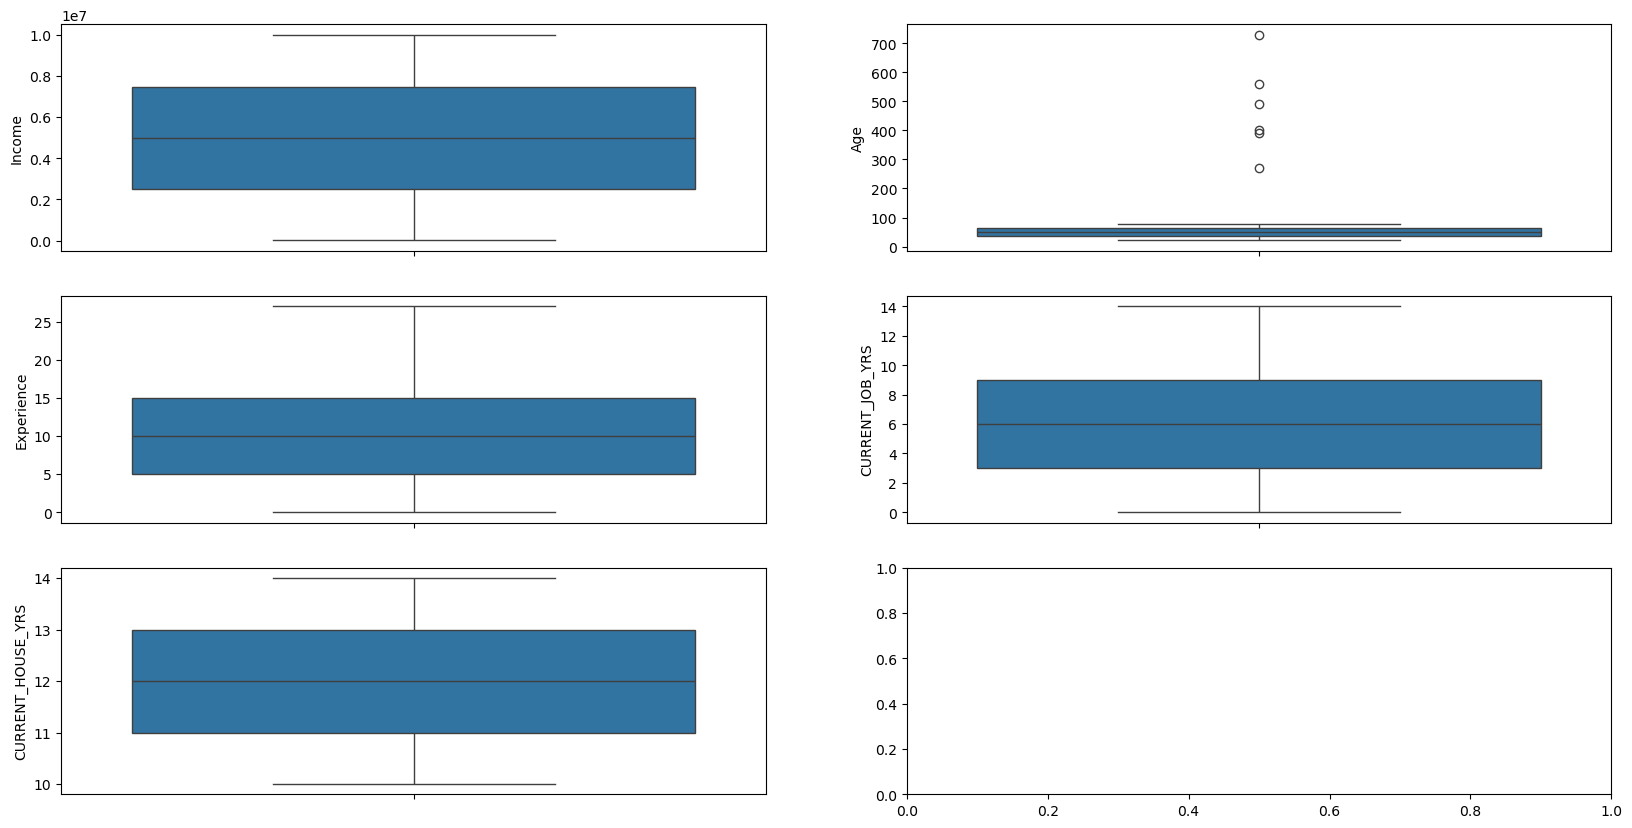

In [75]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize=(20, 10))

for variable, subplot in zip(df_num.columns, ax.flatten()):
    

    sns.boxplot(df_num[variable], ax = subplot)

# display the plot
plt.show()

In [83]:
def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

print("\nOutliers in Each Feature (IQR Method):")
for feature in df_num:
    outliers = detect_outliers_iqr(df, feature)
    print(f"{feature}: {len(outliers)} outliers")


Outliers in Each Feature (IQR Method):
Income: 0 outliers
Age: 6 outliers
Experience: 0 outliers
CURRENT_JOB_YRS: 0 outliers
CURRENT_HOUSE_YRS: 0 outliers


In [85]:
# here we can see few outliers in age column in upper quantile , we can remove them using iqr

In [87]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
UB=Q3 + (1*IQR)

In [89]:
df=df[~(df['Age']>UB)]

In [91]:
df.shape

(251994, 12)

In [95]:
def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

print("\nOutliers in Each Feature (IQR Method):")
for feature in df_num:
    outliers = detect_outliers_iqr(df, feature)
    print(f"{feature}: {len(outliers)} outliers")


Outliers in Each Feature (IQR Method):
Income: 0 outliers
Age: 0 outliers
Experience: 0 outliers
CURRENT_JOB_YRS: 0 outliers
CURRENT_HOUSE_YRS: 0 outliers


In [92]:
# we have successfully remove the outliers

In [331]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

### Visualization

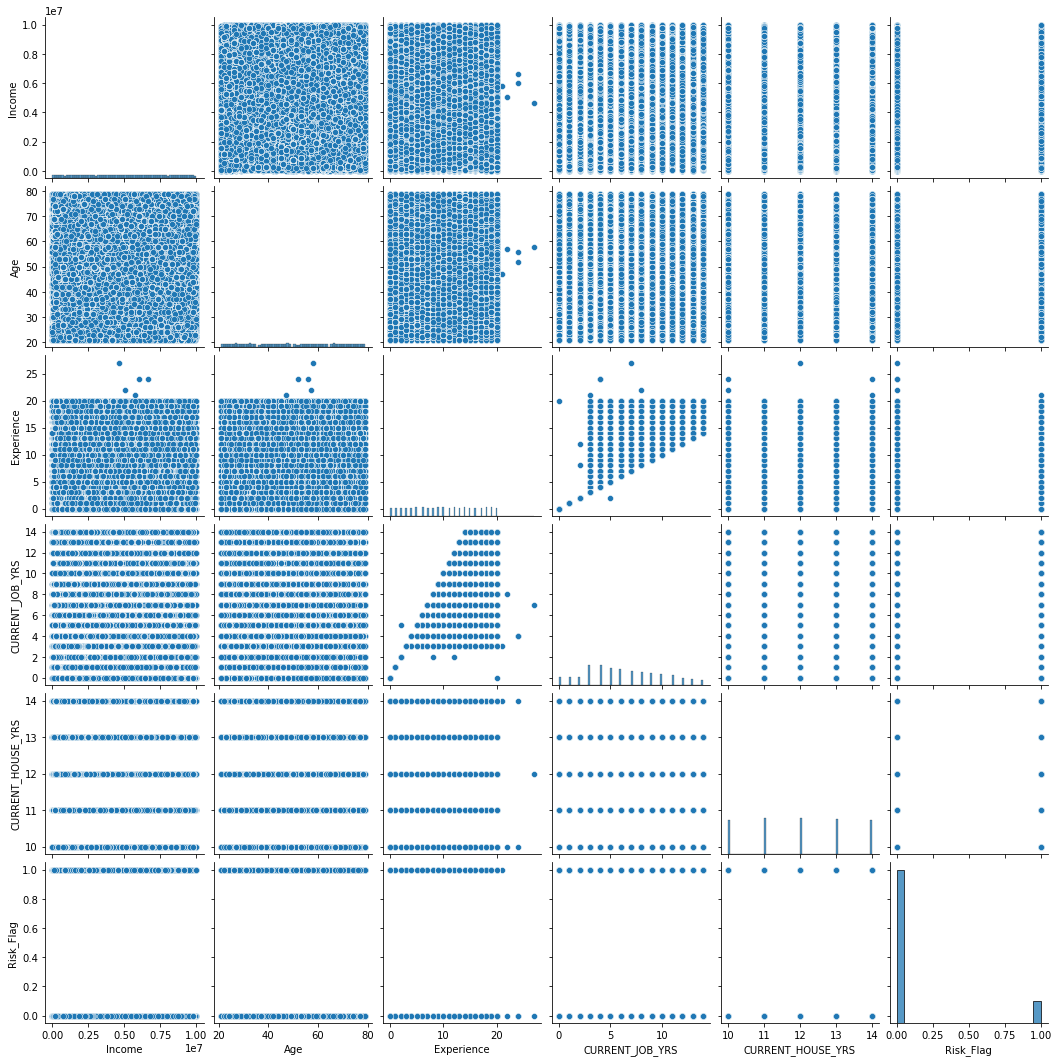

In [94]:
sns.pairplot(df)

In [95]:
#Below plots will illustarte the variation of categorical features with respect to target variable which is ‘risk flag’.

<AxesSubplot:ylabel='Married/Single'>

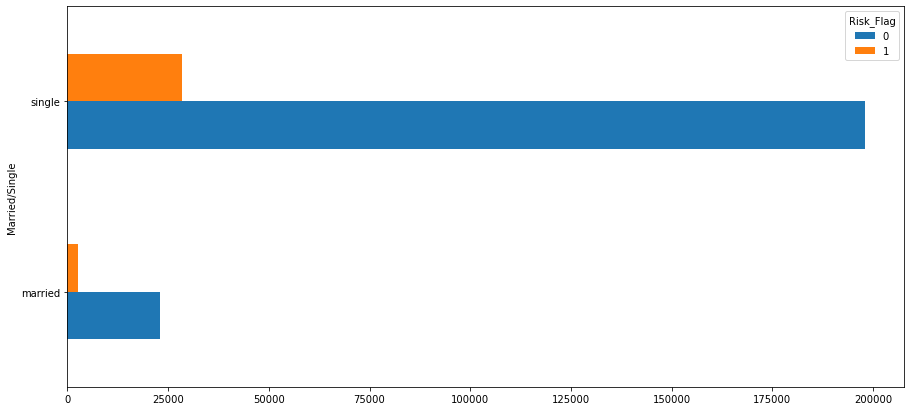

In [335]:

pd.crosstab(index=df['Married/Single'],columns=df['Risk_Flag'],values=df['Married/Single'],aggfunc='count').plot.barh(figsize=(15,7))

<AxesSubplot:ylabel='House_Ownership'>

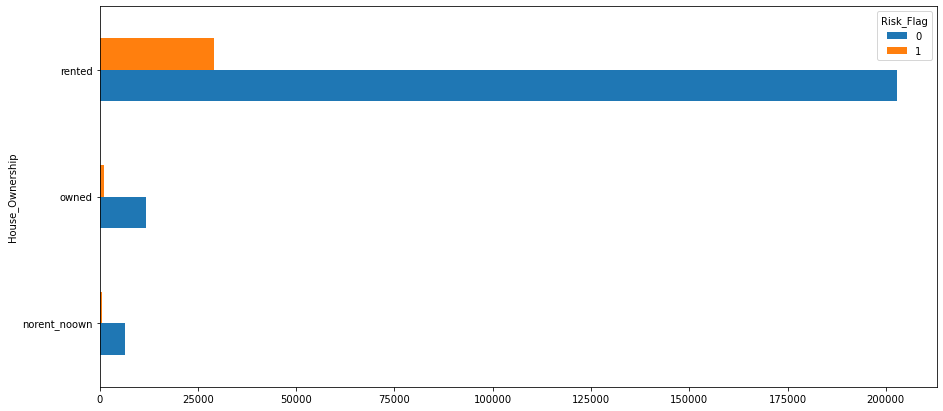

In [336]:
pd.crosstab(index=df['House_Ownership'],columns=df['Risk_Flag'],values=df['House_Ownership'],aggfunc='count').plot.barh(figsize=(15,7))

<AxesSubplot:ylabel='Car_Ownership'>

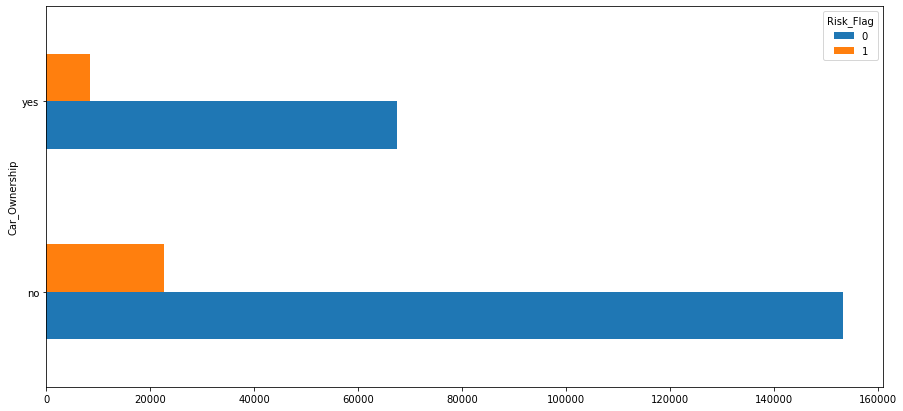

In [337]:
pd.crosstab(index=df['Car_Ownership'],columns=df['Risk_Flag'],values=df['Car_Ownership'],aggfunc='count').plot.barh(figsize=(15,7))

In [ ]:
### alternate

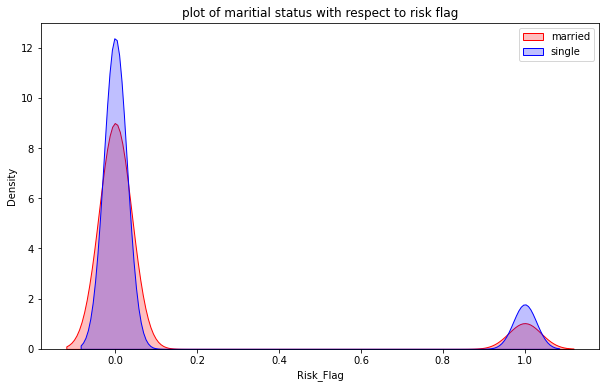

In [96]:
plt.figure(figsize=(10,6))
ax=sns.kdeplot(df.Risk_Flag[(df['Married/Single']=='married')],color='Red',shade=True)
ax=sns.kdeplot(df.Risk_Flag[(df['Married/Single']=='single')],ax=ax,color='Blue',shade=True)
ax.legend(['married','single'])
plt.title('plot of maritial status with respect to risk flag')
plt.show()

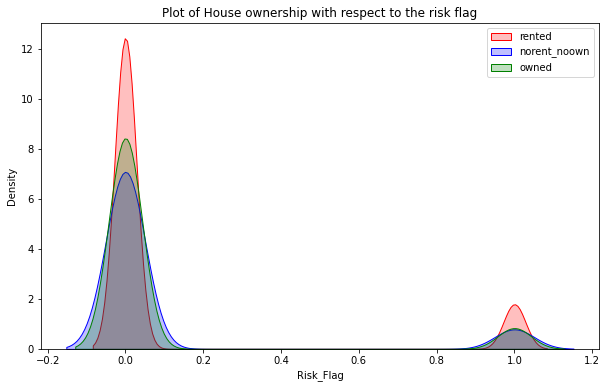

In [97]:
plt.figure(figsize=(10,6))
ax=sns.kdeplot(df.Risk_Flag[(df['House_Ownership']=='rented')],color='Red',shade=True)
ax=sns.kdeplot(df.Risk_Flag[(df['House_Ownership']=='norent_noown')],ax=ax,color='Blue',shade=True)
ax=sns.kdeplot(df.Risk_Flag[(df['House_Ownership']=='owned')],ax=ax,color='Green',shade=True)
ax.legend(['rented','norent_noown','owned'])
plt.title('Plot of House ownership with respect to the risk flag')
plt.show()

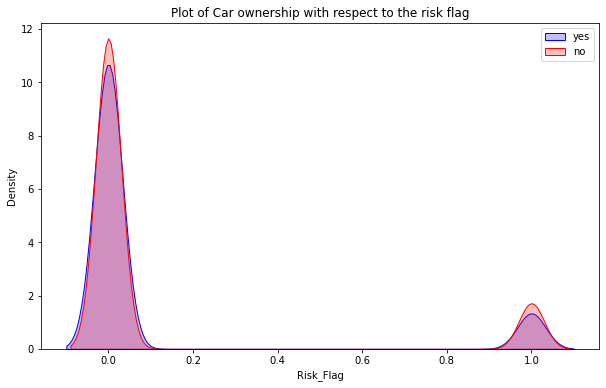

In [98]:
plt.figure(figsize=(10,6))
ax=sns.kdeplot(df.Risk_Flag[(df['Car_Ownership']=='yes')],color='Blue',shade=True)
ax=sns.kdeplot(df.Risk_Flag[(df['Car_Ownership']=='no')],ax=ax,color='Red',shade=True)
ax.legend(['yes','no'])
plt.title('Plot of Car ownership with respect to the risk flag')
plt.show()

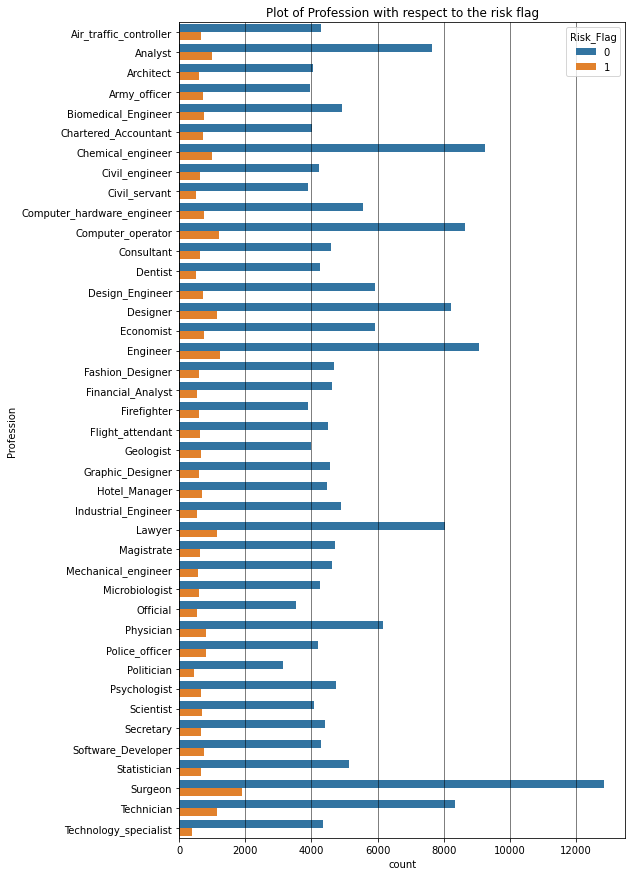

In [99]:
plt.figure(figsize=(8,15))
plt.grid('dark', color='black', ls = '-', lw = 0.5)
sns.countplot(y='Profession',data=df,hue='Risk_Flag',orient='h')
plt.title('Plot of Profession with respect to the risk flag')
plt.show()

<AxesSubplot:xlabel='Risk_Flag', ylabel='STATE'>

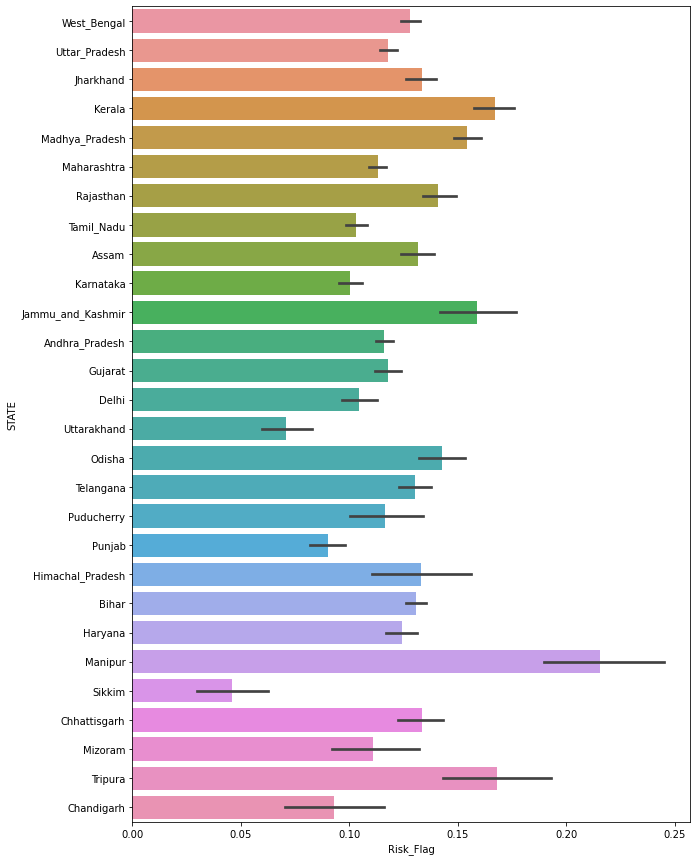

In [100]:
plt.figure(figsize=(10,15))
x=df['STATE']
y1=df['Risk_Flag']==1
sns.barplot(y1,x,orient='h')

In [101]:
# plots for numerical variable vs target variable

<AxesSubplot:xlabel='Income', ylabel='Density'>

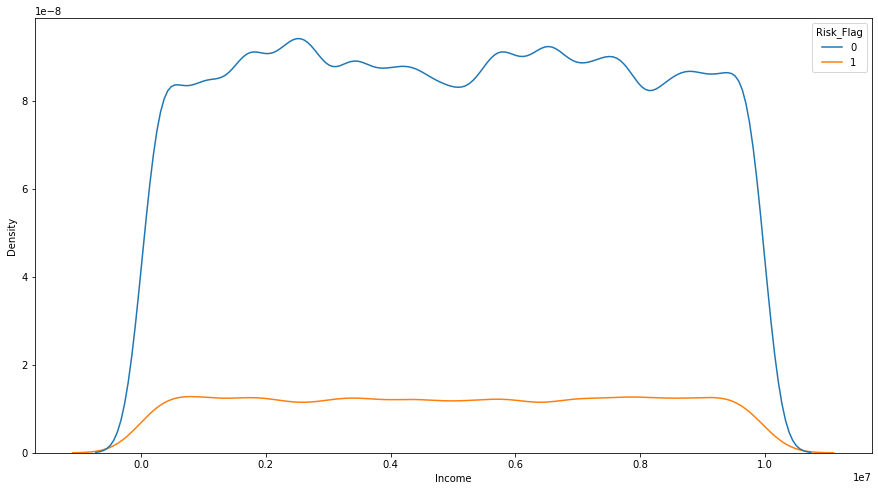

In [102]:
plt.figure(figsize=(15,8))
sns.kdeplot(df.Income,hue=df.Risk_Flag)

<AxesSubplot:xlabel='Experience', ylabel='Density'>

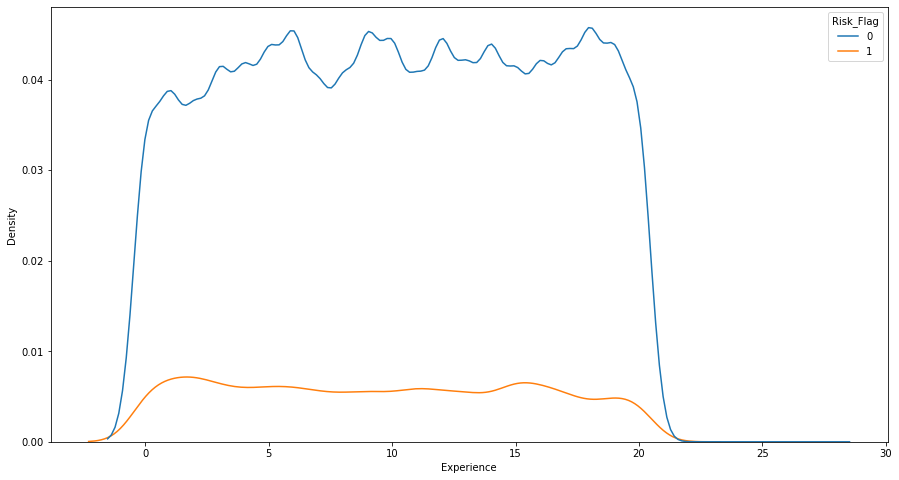

In [103]:
plt.figure(figsize=(15,8))
sns.kdeplot(df.Experience,hue=df.Risk_Flag)

<AxesSubplot:xlabel='CURRENT_JOB_YRS', ylabel='Density'>

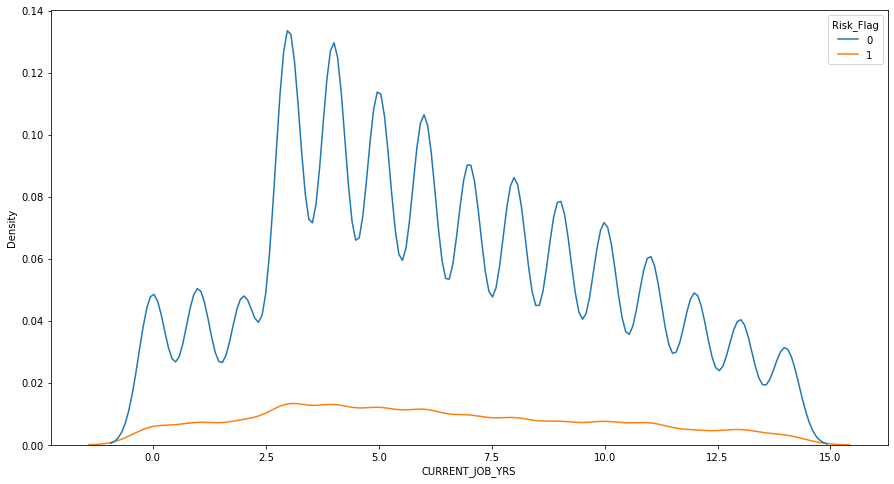

In [104]:
plt.figure(figsize=(15,8))
sns.kdeplot(df.CURRENT_JOB_YRS,hue=df.Risk_Flag)

<AxesSubplot:xlabel='CURRENT_HOUSE_YRS', ylabel='Density'>

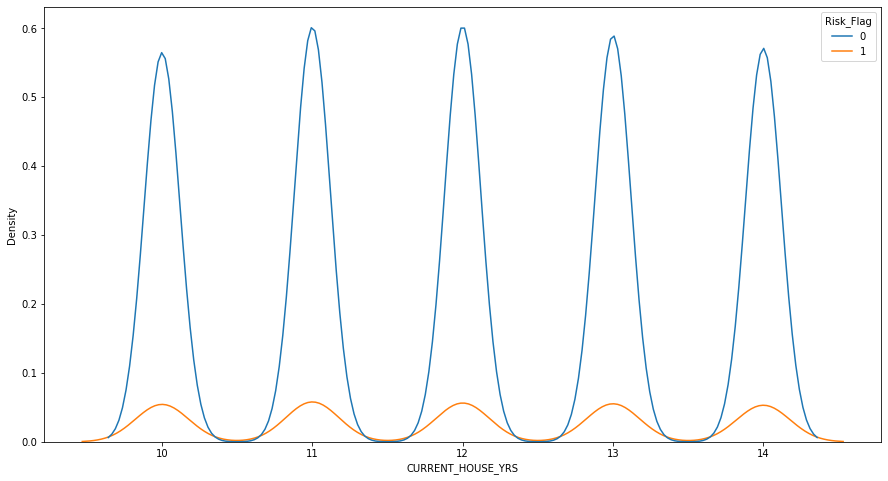

In [105]:
plt.figure(figsize=(15,8))
sns.kdeplot(df.CURRENT_HOUSE_YRS,hue=df.Risk_Flag)

In [283]:
df.skew()

Income               0.005995
Age                 -0.005329
Experience          -0.012678
Married/Single      -2.628371
House_Ownership     -3.791402
Car_Ownership        0.864632
Profession           0.066897
CITY                 0.006252
STATE               -0.037451
CURRENT_JOB_YRS      0.273175
CURRENT_HOUSE_YRS    0.006790
Risk_Flag            2.295749
Income_level        -0.492511
dtype: float64

### Feature Engineeing

In [338]:
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
iqr = q3 - q1
iqr

4974487.0

In [339]:
inc = df['Income']

# define a function to create new levels
# use 'if' statement to pass the conditions
def new_feat(inc):

    if (inc <= q1) & (inc > 0):
        return 'low'
    if (inc >= q1) & (inc < q3):
        return 'medium'
    if (inc > q3):
        return 'high'
    
# apply the function to create a new column
df['Income_level']= df['Income'].apply(new_feat)

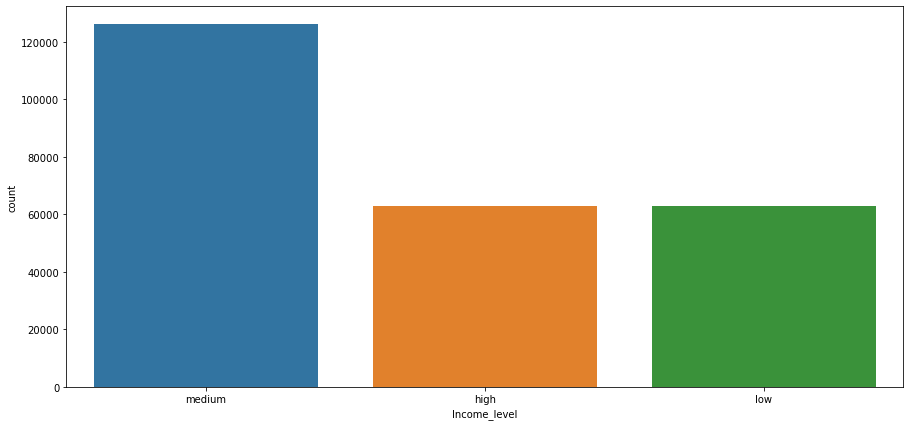

In [341]:
plt.figure(figsize=(15,7))
sns.countplot(df['Income_level'])
plt.show()

### Multicollinerity

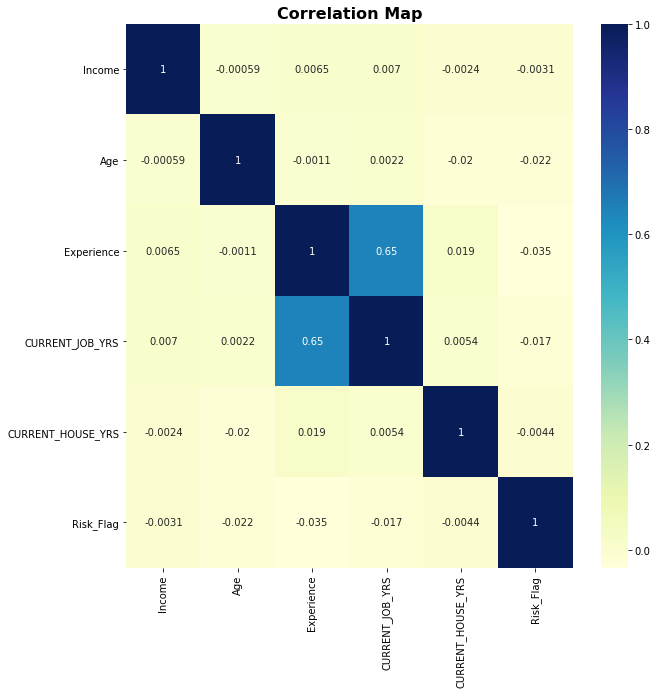

In [108]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)
plt.show()

In [109]:
# here we can see multicollinerity in data

In [110]:
df_num=df.select_dtypes('number')
df_num.drop(['Risk_Flag'],axis=1,inplace=True)
df_num.columns

Index(['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'], dtype='object')

In [111]:
df_numeric_features_vif = df.select_dtypes(include=[np.number])
df_numeric_features_vif.head()

Income  Age  Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0 7315840.000000   71           8                8                 14   
1 9086933.000000   55           7                7                 13   
2 9576258.000000   79          18                6                 11   
3 3208322.000000   55          18                8                 12   
4 3970273.000000   53          14                4                 12   

   Risk_Flag  
0          0  
1          0  
2          0  
3          0  
4          0

In [112]:
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i)
                     for i in range(df_numeric_features_vif.shape[1])]

vif["Features"] = df_numeric_features_vif.columns


vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

VIF_Factor           Features
0   13.442955  CURRENT_HOUSE_YRS
1    8.556448                Age
2    6.830734    CURRENT_JOB_YRS
3    6.545562         Experience
4    3.879165             Income
5    1.138685          Risk_Flag

In [113]:
# here only 1 variable has high multicollinerity

In [114]:
for ind in range(len(df_numeric_features_vif.columns)):
    
    
    vif = pd.DataFrame()    
    
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = df_numeric_features_vif.columns


    multi = vif[vif['VIF_Factor'] > 10]
    
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
  
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

   VIF_Factor         Features
0    3.282605           Income
1    4.516214              Age
2    6.339725       Experience
3    6.600896  CURRENT_JOB_YRS
4    1.125014        Risk_Flag


### Encoding

In [115]:
le=LabelEncoder()

In [116]:
cols = ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE','Income_level']
le=LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

Income  Age  Experience  Married/Single  House_Ownership  \
0 7315840.000000   71           8               0                2   
1 9086933.000000   55           7               1                2   
2 9576258.000000   79          18               1                2   
3 3208322.000000   55          18               1                2   
4 3970273.000000   53          14               1                2   

   Car_Ownership  Profession  CITY  STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0              0           0   145     27                8                 14   
1              0           0   255     25                7                 13   
2              1           0   135     10                6                 11   
3              0           0   166     12                8                 12   
4              0           0   263     13                4                 12   

   Risk_Flag  Income_level  
0          0             2  
1          0             0  
2          0             0  
3          0             2  
4          0             2

In [117]:
df_copy=df.copy()

### Scaling

In [118]:
df.loc[:,['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS'] ] = df.loc[:,['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']].apply(lambda rec: (rec - rec.mean()) / rec.std())

df.head()

Income      Age  Experience  Married/Single  House_Ownership  \
0  0.805622 1.233370   -0.347304               0                2   
1  1.420945 0.295705   -0.513889               1                2   
2  1.590949 1.702202    1.318553               1                2   
3 -0.621435 0.295705    1.318553               1                2   
4 -0.356714 0.178497    0.652210               1                2   

   Car_Ownership  Profession  CITY  STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0              0           0   145     27         0.456868           1.431127   
1              0           0   255     25         0.182673           0.716349   
2              1           0   135     10        -0.091523          -0.713206   
3              0           0   166     12         0.456868           0.001571   
4              0           0   263     13        -0.639913           0.001571   

   Risk_Flag  Income_level  
0          0             2  
1          0             0  
2          0             0  
3          0             2  
4          0             2

In [119]:
df_feature=df.drop(['Risk_Flag'],axis=1)
df_target = df['Risk_Flag']

In [120]:
df_feature=sm.add_constant(df_feature)

In [121]:
df_target.shape

(251994,)

In [122]:
df_feature.shape

(251994, 13)

### Train- Test split

In [123]:
x_train , x_test , y_train, y_test = train_test_split(df_feature,df_target, test_size=0.3, random_state = 10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(176395, 13)
(75599, 13)
(176395,)
(75599,)


In [125]:
columns = ['Model_Name', 'Cohen_kappa_score', 'Accuracy', 'F1_score','Precision','Recall']

In [126]:
test_result_table = pd.DataFrame(columns = columns)

# Logistic Regression model

In [127]:
logreg=sm.Logit(y_train,x_train).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.370315
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Risk_Flag   No. Observations:               176395
Model:                          Logit   Df Residuals:                   176382
Method:                           MLE   Df Model:                           12
Date:                Thu, 17 Mar 2022   Pseudo R-squ.:                0.004786
Time:                        14:29:59   Log-Likelihood:                -65322.
converged:                       True   LL-Null:                       -65636.
Covariance Type:            nonrobust   LLR p-value:                9.617e-127
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4573      0.053    -46.161      0.000      -2.562      -2.353
Income               -0.0387      0.008     -4.942      0.000      -0.054      -0.023
Age                  -0.0662      0.007     -9.099      0.000      -0.080      -0.052
Experience           -0.1190      0.010    -12.065      0.000      -0.138      -0.100
Married/Single        0.2284      0.026      8.872      0.000       0.178       0.279
House_Ownership       0.2054      0.021      9.867      0.000       0.165       0.246
Car_Ownership        -0.1565      0.016     -9.614      0.000      -0.188      -0.125
Profession            0.0004      0.001      0.711      0.477      -0.001       0.002
CITY               7.545e-05    7.9e-05      0.955      0.339   -7.94e-05       0.000
STATE                -0.0013      0.001     -1.652      0.098      -0.003       0.000
CURRENT_JOB_YRS       0.0247      0.010      2.513      0.012       0.005       0.044
CURRENT_HOUSE_YRS    -0.0108      0.007     -1.487      0.137      -0.025       0.003
Income_level         -0.0579      0.010     -6.055      0.000      -0.077      -0.039
=====================================================================================
"""

In [55]:
# here we can see that pseudo r sq value is very less and there are some insignificant variables too

In [128]:
print('AIC:', logreg.aic)

AIC: 130669.29052651823


In [129]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 
df_odds

Odds
const             0.085668
Income            0.962064
Age               0.935937
Experience        0.887787
Married/Single    1.256584
House_Ownership   1.228028
Car_Ownership     0.855152
Profession        1.000428
CITY              1.000075
STATE             0.998695
CURRENT_JOB_YRS   1.024976
CURRENT_HOUSE_YRS 0.989224
Income_level      0.943737

In [130]:
y_pred_prob_train = logreg.predict(x_train)
y_pred_prob_train.head()

202091   0.097985
239619   0.139070
31954    0.115577
126468   0.108533
160459   0.120781
dtype: float64

In [131]:
y_pred_train = [ 0 if x < 0.2 else 1 for x in y_pred_prob_train]

In [132]:
y_pred_train[0:5]

[0, 0, 0, 0, 0]

In [133]:
acc_table = classification_report(y_train, y_pred_train)

print(acc_table)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    154767
           1       0.00      0.00      0.00     21628

    accuracy                           0.88    176395
   macro avg       0.44      0.50      0.47    176395
weighted avg       0.77      0.88      0.82    176395



In [134]:
y_pred_prob = logreg.predict(x_test)
y_pred_prob.head()

58851    0.119095
18595    0.099390
163702   0.128666
225081   0.114749
12043    0.088154
dtype: float64

In [135]:
y_pred = [ 0 if x < 0.2 else 1 for x in y_pred_prob]

In [136]:
y_pred[0:5]

[0, 0, 0, 0, 0]

In [137]:
acc_table = classification_report(y_test, y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66232
           1       0.00      0.00      0.00      9367

    accuracy                           0.88     75599
   macro avg       0.44      0.50      0.47     75599
weighted avg       0.77      0.88      0.82     75599



In [140]:
cohen_kappa_score_base=cohen_kappa_score(y_test,y_pred)
cohen_kappa_score_base

0.0

#### Confusion Matrix

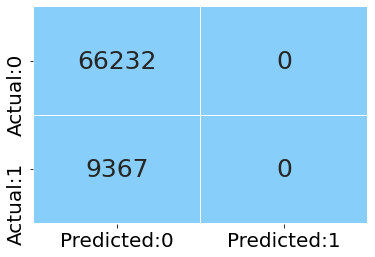

In [138]:

cm = confusion_matrix(y_test, y_pred)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)


plt.yticks(fontsize = 20)

plt.show()

#### Roc curve

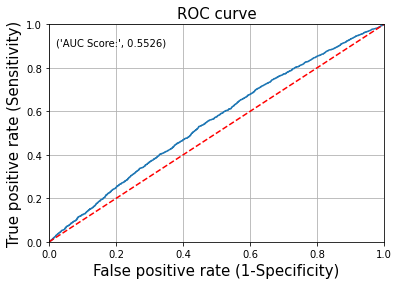

In [343]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


plt.plot(fpr, tpr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

In [ ]:
## test report for base model

In [143]:
Logistic_reg_base = pd.Series({'Model_Name': "Logistic_Regression base",
                          'Cohen_kappa_score':cohen_kappa_score_base,
                          'Accuracy':0.88,
                          'F1_score':0.0,
                           'Precision':0.0,
                            'Recall':0.0 })

# append the values to the result table
test_result_table = test_result_table.append(Logistic_reg_base, ignore_index = True)

# print the result table
test_result_table

Model_Name  Cohen_kappa_score  Accuracy  F1_score  Precision  \
0  Logistic_Regression base           0.000000  0.880000  0.000000   0.000000   

    Recall  
0 0.000000

#### Youden Index (best cut off value)

In [145]:

youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR


youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

TPR      FPR  Threshold  Difference
0 0.530373 0.447004   0.124962    0.083368
1 0.530373 0.447065   0.124957    0.083308
2 0.530479 0.447261   0.124949    0.083218
3 0.530479 0.447276   0.124946    0.083203
4 0.530373 0.447201   0.124955    0.083172

In [146]:
y_pred_new = [ 0 if x < 0.12 else 1 for x in y_pred_prob]

In [147]:
y_pred_new[0:5]

[0, 0, 1, 0, 0]

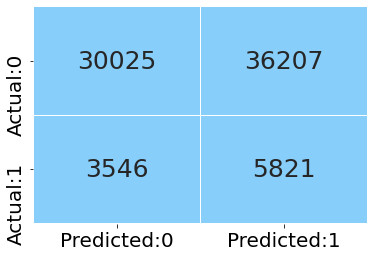

In [148]:

cm = confusion_matrix(y_test, y_pred_new)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)


plt.yticks(fontsize = 20)

plt.show()

In [72]:
acc_table = classification_report(y_test, y_pred_new)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.89      0.45      0.60     66232
           1       0.14      0.62      0.23      9367

    accuracy                           0.47     75599
   macro avg       0.52      0.54      0.41     75599
weighted avg       0.80      0.47      0.56     75599



In [149]:
cohen_kappa_youden=cohen_kappa_score(y_test,y_pred_new)
cohen_kappa_youden

0.029944889480093884

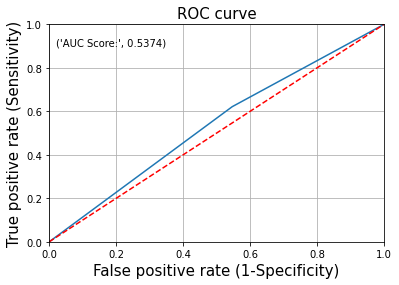

In [342]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_new)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_new),4)))
                               
# plot the grid
plt.grid(True)

In [150]:
Logistic_reg_youden = pd.Series({'Model_Name': "Logistic_Regression with Youdens index",
                          'Cohen_kappa_score':cohen_kappa_youden,
                          'Accuracy':0.47,
                          'F1_score':0.23,
                           'Precision':0.14,
                            'Recall':0.62 })

# append the values to the result table
test_result_table = test_result_table.append(Logistic_reg_youden, ignore_index = True)

# print the result table
test_result_table

Model_Name  Cohen_kappa_score  Accuracy  \
0                Logistic_Regression base           0.000000  0.880000   
1  Logistic_Regression with Youdens index           0.029945  0.470000   

   F1_score  Precision   Recall  
0  0.000000   0.000000 0.000000  
1  0.230000   0.140000 0.620000

#### recursive feature elimination

In [151]:
X_train_rfe = x_train.iloc[:,1:]
X_test_rfe = x_test.iloc[:,1:]

logreg = LogisticRegression()

rfe_model = RFE(estimator = logreg, n_features_to_select = None)


rfe_model = rfe_model.fit(X_train_rfe, y_train)


feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)

signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Income_level'],
      dtype='object')


In [152]:
x_test_rfe=x_test[['const', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Income_level']]

In [153]:
x_train_rfe=x_train[['const', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Income_level']]

#### Improved Model

In [154]:
logreg_rfe = sm.Logit(y_train, x_train[['const', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Income_level']]).fit()

print(logreg_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.370420
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Risk_Flag   No. Observations:               176395
Model:                          Logit   Df Residuals:                   176388
Method:                           MLE   Df Model:                            6
Date:                Thu, 17 Mar 2022   Pseudo R-squ.:                0.004503
Time:                        14:44:51   Log-Likelihood:                -65340.
converged:                       True   LL-Null:                       -65636.
Covariance Type:            nonrobust   LLR p-value:                1.900e-124
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.4760      0.049    -50.824      0.000      -2.571      -2.380
Age           

In [155]:
print('AIC:', logreg_rfe.aic)

AIC: 130694.43498199289


In [156]:
y_pred_train_rfe=logreg_rfe.predict(x_train_rfe)
y_pred_train_rfe

202091   0.098100
239619   0.140609
31954    0.116011
126468   0.114537
160459   0.114318
95780    0.082782
23618    0.137695
41359    0.155940
16150    0.095137
36096    0.077736
242133   0.099315
196847   0.157667
42022    0.118937
105304   0.097410
86154    0.121222
151939   0.106601
62440    0.124679
10742    0.143925
145145   0.161445
42969    0.123360
54100    0.118252
92280    0.107729
123554   0.096679
23829    0.128876
212958   0.145351
64087    0.114475
39990    0.123757
198073   0.121278
175529   0.082447
216885   0.140253
144867   0.086570
94178    0.140673
211473   0.130102
167643   0.108585
87043    0.148127
44706    0.091350
216834   0.101443
178336   0.143530
37126    0.132459
188295   0.141029
109023   0.109730
240283   0.099375
198142   0.139025
96942    0.103817
84213    0.094396
210051   0.128387
44753    0.151704
206620   0.121115
168206   0.136542
158359   0.121648
156734   0.124803
43428    0.106102
109078   0.135009
86956    0.161966
172474   0.125434
20683    0

In [160]:
y_pred_prob_rfe_test = logreg_rfe.predict(x_test_rfe)
y_pred_prob_rfe_test.head()

58851    0.122441
18595    0.097985
163702   0.123011
225081   0.108371
12043    0.092667
dtype: float64

In [161]:
y_pred_rfe_test = [ 0 if x < 0.12 else 1 for x in y_pred_prob_rfe_test]

In [162]:
y_pred_rfe_test[0:5]

[1, 0, 1, 0, 0]

#### Confusion Matrix

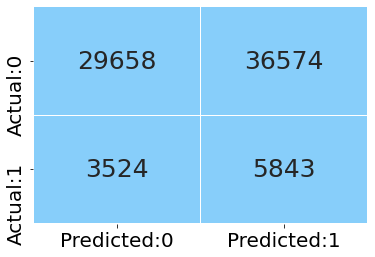

In [163]:

cm = confusion_matrix(y_test, y_pred_rfe_test)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)


plt.yticks(fontsize = 20)

plt.show()

In [164]:
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

In [165]:
acc_table = classification_report(y_test, y_pred_rfe_test)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.89      0.45      0.60     66232
           1       0.14      0.62      0.23      9367

    accuracy                           0.47     75599
   macro avg       0.52      0.54      0.41     75599
weighted avg       0.80      0.47      0.55     75599



In [168]:
cohen_kappa_score_logreg_rfe=cohen_kappa_score(y_test,y_pred_rfe_test)
cohen_kappa_score_logreg_rfe

0.028463062263394123

#### Roc curve

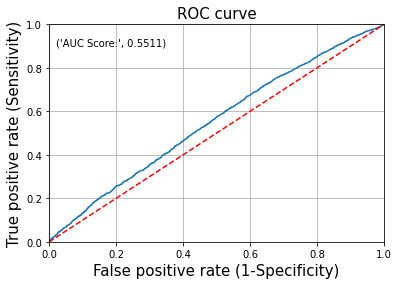

In [344]:
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rfe_test)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_rfe_test),4)))
                               
# plot the grid
plt.grid(True)

In [ ]:
# test Report

In [170]:
Logistic_reg_rfe_youden = pd.Series({'Model_Name': "Logistic_Regression with Youdens index and rfe",
                          'Cohen_kappa_score':cohen_kappa_score_logreg_rfe,
                          'Accuracy':0.47,
                          'F1_score':0.23,
                           'Precision':0.14,
                            'Recall':0.62 })

# append the values to the result table
test_result_table = test_result_table.append(Logistic_reg_rfe_youden, ignore_index = True)

# print the result table
test_result_table

Model_Name  Cohen_kappa_score  \
0                        Logistic_Regression base           0.000000   
1          Logistic_Regression with Youdens index           0.029945   
2  Logistic_Regression with Youdens index and rfe           0.028463   

   Accuracy  F1_score  Precision   Recall  
0  0.880000  0.000000   0.000000 0.000000  
1  0.470000  0.230000   0.140000 0.620000  
2  0.470000  0.230000   0.140000 0.620000

In [83]:
# here we can see that youden index made some change in model , but rfe dosenot

In [84]:
# next model

In [171]:
df_copy.head()

Income  Age  Experience  Married/Single  House_Ownership  \
0 7315840.000000   71           8               0                2   
1 9086933.000000   55           7               1                2   
2 9576258.000000   79          18               1                2   
3 3208322.000000   55          18               1                2   
4 3970273.000000   53          14               1                2   

   Car_Ownership  Profession  CITY  STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0              0           0   145     27                8                 14   
1              0           0   255     25                7                 13   
2              1           0   135     10                6                 11   
3              0           0   166     12                8                 12   
4              0           0   263     13                4                 12   

   Risk_Flag  Income_level  
0          0             2  
1          0             0  
2          0             0  
3          0             2  
4          0             2

In [172]:
df_copy.shape

(251994, 13)

In [173]:
df_feat=df_copy.drop(['Risk_Flag'],axis=1)
df_feat.head()

Income  Age  Experience  Married/Single  House_Ownership  \
0 7315840.000000   71           8               0                2   
1 9086933.000000   55           7               1                2   
2 9576258.000000   79          18               1                2   
3 3208322.000000   55          18               1                2   
4 3970273.000000   53          14               1                2   

   Car_Ownership  Profession  CITY  STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0              0           0   145     27                8                 14   
1              0           0   255     25                7                 13   
2              1           0   135     10                6                 11   
3              0           0   166     12                8                 12   
4              0           0   263     13                4                 12   

   Income_level  
0             2  
1             0  
2             0  
3             2  
4             2

In [174]:
df_target.head()

0    0
1    0
2    0
3    0
4    0
Name: Risk_Flag, dtype: int64

In [175]:
x_train , x_test , y_train, y_test = train_test_split(df_feat,df_target, test_size=0.3, random_state = 10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(176395, 12)
(75599, 12)
(176395,)
(75599,)


In [176]:
def get_train_report(model):
    

    train_pred = model.predict(x_train)

  
    print(classification_report(y_train, train_pred))
    kappa_sc=cohen_kappa_score(y_train,train_pred)
    print('cohen_kappa_score:',kappa_sc)
    return

In [345]:
def get_test_report(model):
    
  
    test_pred = model.predict(x_test)

    
    print(classification_report(y_test, test_pred),'\n')
    kappa_sc=cohen_kappa_score(y_test,test_pred)
    print('cohen_kappa_score:',kappa_sc,'\n')
    print('Confusion Matrix','\n')
    cm = confusion_matrix(y_test, test_pred)


    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)


    plt.yticks(fontsize = 20)

    plt.show()
    
    print('Roc Curve','\n')
    
    fpr,tpr,threshold=roc_curve(y_test,test_pred)
    plt.plot(fpr,tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve ',
           fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', 
           fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)',
           fontsize = 15)

    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', 
                                 round(metrics.roc_auc_score(y_test, test_pred),4)))
                               
    plt.grid(True)
    
    return

# Decision Tree

In [178]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

decision_tree = decision_tree_classification.fit(x_train, y_train)

In [93]:
train_report = get_train_report(decision_tree)
print(train_report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96    154767
           1       0.72      0.79      0.76     21628

    accuracy                           0.94    176395
   macro avg       0.85      0.87      0.86    176395
weighted avg       0.94      0.94      0.94    176395

cohen_kappa_score: 0.7208686250779541
None


              precision    recall  f1-score   support

           0       0.97      0.89      0.93     66232
           1       0.51      0.82      0.63      9367

    accuracy                           0.88     75599
   macro avg       0.74      0.85      0.78     75599
weighted avg       0.91      0.88      0.89     75599
 

cohen_kappa_score: 0.5619645819089121 

Confusion Matrix 



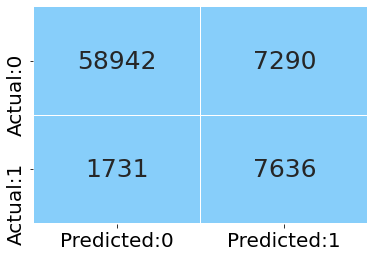

Roc Curve 

None


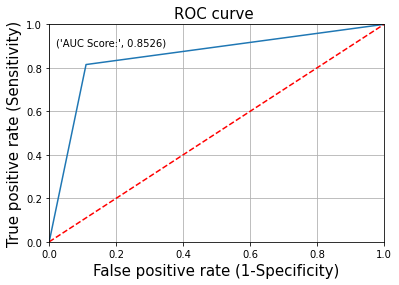

In [346]:
test_report = get_test_report(decision_tree)

print(test_report)

In [187]:
Decision_tree = pd.Series({'Model_Name': "Decision Tree",
                          'Cohen_kappa_score':0.473,
                          'Accuracy':0.88,
                          'F1_score':0.54,
                           'Precision':0.52,
                            'Recall':0.56 })

# append the values to the result table
test_result_table = test_result_table.append(Decision_tree, ignore_index = True)

# print the result table
test_result_table

Model_Name  Cohen_kappa_score  \
0                        Logistic_Regression base           0.000000   
1          Logistic_Regression with Youdens index           0.029945   
2  Logistic_Regression with Youdens index and rfe           0.028463   
3                                   Decision Tree           0.473000   

   Accuracy  F1_score  Precision   Recall  
0  0.880000  0.000000   0.000000 0.000000  
1  0.470000  0.230000   0.140000 0.620000  
2  0.470000  0.230000   0.140000 0.620000  
3  0.880000  0.540000   0.520000 0.560000

In [95]:
# we can see the difference between the accuracy of train data and test data

### Hypertuning

In [96]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                    'max_features': ["sqrt", "log2"],
                    'min_samples_split': range(2,10)}]
 
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid_model = tree_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_split': 2} 



### Tuned Model

In [188]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 9,
                                  max_features = 'sqrt',
                                  min_samples_split = 2,
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(x_train, y_train)

In [189]:
print( get_train_report(dt_model))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94    154767
           1       0.65      0.05      0.09     21628

    accuracy                           0.88    176395
   macro avg       0.77      0.52      0.51    176395
weighted avg       0.85      0.88      0.83    176395

cohen_kappa_score: 0.07742879616071974
None


              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66232
           1       0.59      0.04      0.08      9367

    accuracy                           0.88     75599
   macro avg       0.73      0.52      0.51     75599
weighted avg       0.84      0.88      0.83     75599
 

cohen_kappa_score: 0.06366352007617193 

Confusion Matrix 



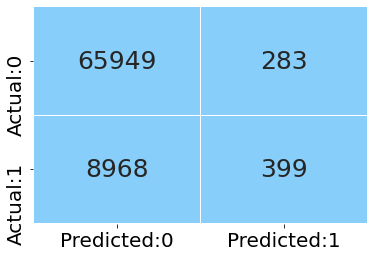

Roc Curve 

None


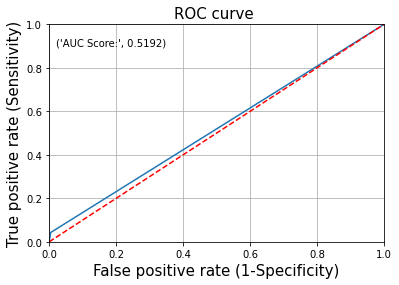

In [347]:
print( get_test_report(dt_model))

In [191]:
Decision_tree_tuned = pd.Series({'Model_Name': "Decision Tree with tuned parameters",
                          'Cohen_kappa_score':0.064,
                          'Accuracy':0.88,
                          'F1_score':0.08,
                           'Precision':0.59,
                            'Recall':0.04 })

# append the values to the result table
test_result_table = test_result_table.append(Decision_tree_tuned, ignore_index = True)

# print the result table
test_result_table

Model_Name  Cohen_kappa_score  \
0                        Logistic_Regression base           0.000000   
1          Logistic_Regression with Youdens index           0.029945   
2  Logistic_Regression with Youdens index and rfe           0.028463   
3                                   Decision Tree           0.473000   
4             Decision Tree with tuned parameters           0.064000   

   Accuracy  F1_score  Precision   Recall  
0  0.880000  0.000000   0.000000 0.000000  
1  0.470000  0.230000   0.140000 0.620000  
2  0.470000  0.230000   0.140000 0.620000  
3  0.880000  0.540000   0.520000 0.560000  
4  0.880000  0.080000   0.590000 0.040000

# Random forest

In [192]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

rft_model = rf_classification.fit(x_train, y_train)

In [193]:
train_report = get_train_report(rft_model)

print(train_report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96    154767
           1       0.71      0.78      0.74     21628

    accuracy                           0.93    176395
   macro avg       0.84      0.87      0.85    176395
weighted avg       0.94      0.93      0.93    176395

cohen_kappa_score: 0.7021312229441523
None


              precision    recall  f1-score   support

           0       0.93      0.95      0.94     66232
           1       0.60      0.53      0.56      9367

    accuracy                           0.90     75599
   macro avg       0.77      0.74      0.75     75599
weighted avg       0.89      0.90      0.89     75599
 

cohen_kappa_score: 0.5045514657907894 

Confusion Matrix 



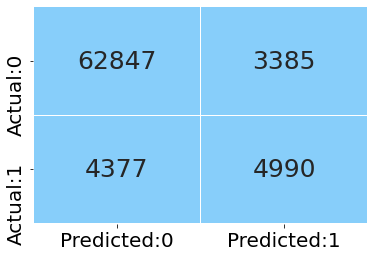

Roc Curve 

None


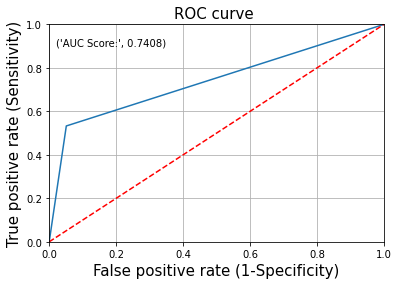

In [348]:
test_report = get_test_report(rft_model)

print(test_report) 

In [195]:
Random_forest = pd.Series({'Model_Name': "Random Forest",
                          'Cohen_kappa_score':0.505,
                          'Accuracy':0.90,
                          'F1_score':0.56,
                           'Precision':0.60,
                            'Recall':0.53 })

# append the values to the result table
test_result_table = test_result_table.append(Random_forest, ignore_index = True)

# print the result table
test_result_table

Model_Name  Cohen_kappa_score  \
0                        Logistic_Regression base           0.000000   
1          Logistic_Regression with Youdens index           0.029945   
2  Logistic_Regression with Youdens index and rfe           0.028463   
3                                   Decision Tree           0.473000   
4             Decision Tree with tuned parameters           0.064000   
5                                   Random Forest           0.505000   

   Accuracy  F1_score  Precision   Recall  
0  0.880000  0.000000   0.000000 0.000000  
1  0.470000  0.230000   0.140000 0.620000  
2  0.470000  0.230000   0.140000 0.620000  
3  0.880000  0.540000   0.520000 0.560000  
4  0.880000  0.080000   0.590000 0.040000  
5  0.900000  0.560000   0.600000 0.530000

### Hypertuning

In [107]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90]}]

random_forest_classification = RandomForestClassifier(random_state = 10)


rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(x_train, y_train)


print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'n_estimators': 70} 



### Tuned Model

In [196]:
rf_model = RandomForestClassifier(criterion = 'entropy', 
                                  n_estimators = 70,
                                  random_state = 10)

rf_model = rf_model.fit(x_train, y_train)




In [197]:
print('Classification Report for test set:\n', get_train_report(rf_model))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96    154767
           1       0.72      0.80      0.76     21628

    accuracy                           0.94    176395
   macro avg       0.85      0.88      0.86    176395
weighted avg       0.94      0.94      0.94    176395

cohen_kappa_score: 0.7232247805557119
Classification Report for test set:
 None


              precision    recall  f1-score   support

           0       0.93      0.95      0.94     66232
           1       0.61      0.53      0.56      9367

    accuracy                           0.90     75599
   macro avg       0.77      0.74      0.75     75599
weighted avg       0.89      0.90      0.90     75599
 

cohen_kappa_score: 0.50755091974374 

Confusion Matrix 



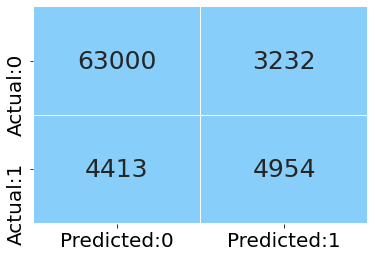

Roc Curve 

Classification Report for test set:
 None


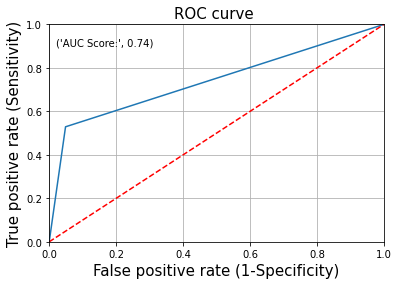

In [349]:
print('Classification Report for test set:\n', get_test_report(rf_model))

In [199]:
Random_forest_tuned = pd.Series({'Model_Name': "Random forest with tuned parameters",
                          'Cohen_kappa_score':0.508,
                          'Accuracy':0.90,
                          'F1_score':0.56,
                           'Precision':0.61,
                            'Recall':0.53 })

# append the values to the result table
test_result_table = test_result_table.append(Random_forest_tuned, ignore_index = True)

# print the result table
test_result_table

Model_Name  Cohen_kappa_score  \
0                        Logistic_Regression base           0.000000   
1          Logistic_Regression with Youdens index           0.029945   
2  Logistic_Regression with Youdens index and rfe           0.028463   
3                                   Decision Tree           0.473000   
4             Decision Tree with tuned parameters           0.064000   
5                                   Random Forest           0.505000   
6             Random forest with tuned parameters           0.508000   

   Accuracy  F1_score  Precision   Recall  
0  0.880000  0.000000   0.000000 0.000000  
1  0.470000  0.230000   0.140000 0.620000  
2  0.470000  0.230000   0.140000 0.620000  
3  0.880000  0.540000   0.520000 0.560000  
4  0.880000  0.080000   0.590000 0.040000  
5  0.900000  0.560000   0.600000 0.530000  
6  0.900000  0.560000   0.610000 0.530000

# Boosting techniques

In [201]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier

## Ada Boosting

In [202]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

ada_model.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [203]:
train_report = get_train_report(ada_model)
print(train_report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    154767
           1       0.71      0.00      0.00     21628

    accuracy                           0.88    176395
   macro avg       0.79      0.50      0.47    176395
weighted avg       0.86      0.88      0.82    176395

cohen_kappa_score: 0.0018316734881467234
None


              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66232
           1       0.56      0.00      0.00      9367

    accuracy                           0.88     75599
   macro avg       0.72      0.50      0.47     75599
weighted avg       0.84      0.88      0.82     75599
 

cohen_kappa_score: 0.0008288802291578357 

Confusion Matrix 



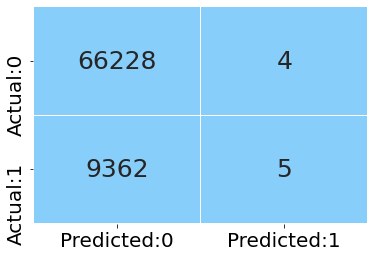

Roc Curve 

None


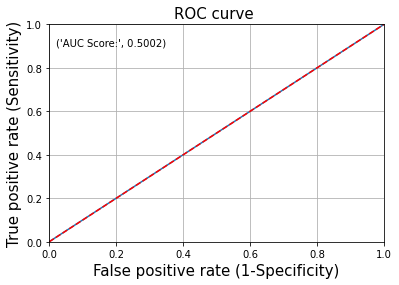

In [350]:
test_report = get_test_report(ada_model)
print(test_report)

In [205]:
Ada_boosting = pd.Series({'Model_Name': "Ada Boosting",
                          'Cohen_kappa_score':0.0008,
                          'Accuracy':0.88,
                          'F1_score':0.00,
                           'Precision':0.56,
                            'Recall':0.00 })

# append the values to the result table
test_result_table = test_result_table.append(Ada_boosting, ignore_index = True)

# print the result table
test_result_table

Model_Name  Cohen_kappa_score  \
0                        Logistic_Regression base           0.000000   
1          Logistic_Regression with Youdens index           0.029945   
2  Logistic_Regression with Youdens index and rfe           0.028463   
3                                   Decision Tree           0.473000   
4             Decision Tree with tuned parameters           0.064000   
5                                   Random Forest           0.505000   
6             Random forest with tuned parameters           0.508000   
7                                    Ada Boosting           0.000800   

   Accuracy  F1_score  Precision   Recall  
0  0.880000  0.000000   0.000000 0.000000  
1  0.470000  0.230000   0.140000 0.620000  
2  0.470000  0.230000   0.140000 0.620000  
3  0.880000  0.540000   0.520000 0.560000  
4  0.880000  0.080000   0.590000 0.040000  
5  0.900000  0.560000   0.600000 0.530000  
6  0.900000  0.560000   0.610000 0.530000  
7  0.880000  0.000000   0.560000 0.000000

# Gradient Boosting

In [206]:
Grad_model = GradientBoostingClassifier(n_estimators = 40, random_state = 10)

Grad_model.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=40, random_state=10)

In [207]:
train_report = get_train_report(Grad_model)
print(train_report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    154767
           1       0.82      0.00      0.00     21628

    accuracy                           0.88    176395
   macro avg       0.85      0.50      0.47    176395
weighted avg       0.87      0.88      0.82    176395

cohen_kappa_score: 0.0018076369263652081
None


              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66232
           1       0.89      0.00      0.00      9367

    accuracy                           0.88     75599
   macro avg       0.88      0.50      0.47     75599
weighted avg       0.88      0.88      0.82     75599
 

cohen_kappa_score: 0.0014689642264484881 

Confusion Matrix 



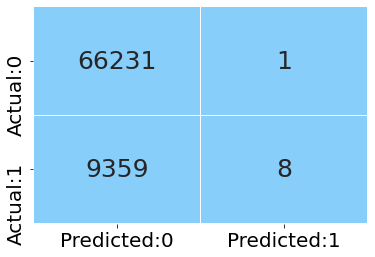

Roc Curve 

None


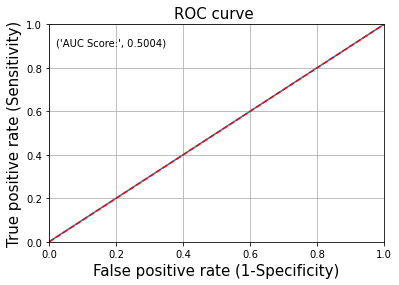

In [362]:
test_report = get_test_report(Grad_model)
print(test_report)

In [209]:
Gradient_boosting = pd.Series({'Model_Name': "Gradient Boosting",
                          'Cohen_kappa_score':0.0014,
                          'Accuracy':0.88,
                          'F1_score':0.00,
                           'Precision':0.89,
                            'Recall':0.00 })

# append the values to the result table
test_result_table = test_result_table.append(Gradient_boosting, ignore_index = True)

# print the result table
test_result_table

Model_Name  Cohen_kappa_score  \
0                        Logistic_Regression base           0.000000   
1          Logistic_Regression with Youdens index           0.029945   
2  Logistic_Regression with Youdens index and rfe           0.028463   
3                                   Decision Tree           0.473000   
4             Decision Tree with tuned parameters           0.064000   
5                                   Random Forest           0.505000   
6             Random forest with tuned parameters           0.508000   
7                                    Ada Boosting           0.000800   
8                               Gradient Boosting           0.001400   

   Accuracy  F1_score  Precision   Recall  
0  0.880000  0.000000   0.000000 0.000000  
1  0.470000  0.230000   0.140000 0.620000  
2  0.470000  0.230000   0.140000 0.620000  
3  0.880000  0.540000   0.520000 0.560000  
4  0.880000  0.080000   0.590000 0.040000  
5  0.900000  0.560000   0.600000 0.530000  
6  0.900000  0.560000   0.610000 0.530000  
7  0.880000  0.000000   0.560000 0.000000  
8  0.880000  0.000000   0.890000 0.000000

## XG Boosting

In [210]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(x_train, y_train)

[15:12:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [211]:
train_report = get_train_report(xgb_model)

print(train_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95    154767
           1       0.68      0.62      0.65     21628

    accuracy                           0.92    176395
   macro avg       0.82      0.79      0.80    176395
weighted avg       0.92      0.92      0.92    176395

cohen_kappa_score: 0.6062776632164587
None


              precision    recall  f1-score   support

           0       0.93      0.95      0.94     66232
           1       0.60      0.50      0.55      9367

    accuracy                           0.90     75599
   macro avg       0.77      0.73      0.74     75599
weighted avg       0.89      0.90      0.89     75599
 

cohen_kappa_score: 0.4892672786475317 

Confusion Matrix 



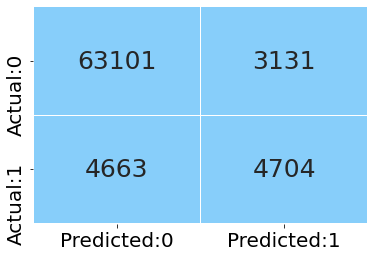

Roc Curve 

None


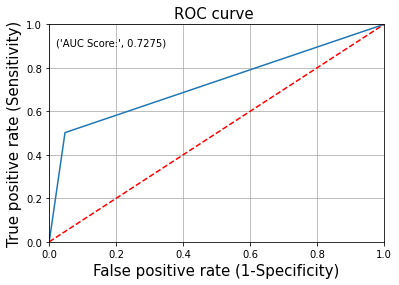

In [363]:
test_report = get_test_report(xgb_model)

print(test_report)

In [213]:
xg_boosting = pd.Series({'Model_Name': "XG Boosting",
                          'Cohen_kappa_score':0.489,
                          'Accuracy':0.90,
                          'F1_score':0.55,
                           'Precision':0.60,
                            'Recall':0.50 })

# append the values to the result table
test_result_table = test_result_table.append(xg_boosting, ignore_index = True)

# print the result table
test_result_table

Model_Name  Cohen_kappa_score  \
0                        Logistic_Regression base           0.000000   
1          Logistic_Regression with Youdens index           0.029945   
2  Logistic_Regression with Youdens index and rfe           0.028463   
3                                   Decision Tree           0.473000   
4             Decision Tree with tuned parameters           0.064000   
5                                   Random Forest           0.505000   
6             Random forest with tuned parameters           0.508000   
7                                    Ada Boosting           0.000800   
8                               Gradient Boosting           0.001400   
9                                     XG Boosting           0.489000   

   Accuracy  F1_score  Precision   Recall  
0  0.880000  0.000000   0.000000 0.000000  
1  0.470000  0.230000   0.140000 0.620000  
2  0.470000  0.230000   0.140000 0.620000  
3  0.880000  0.540000   0.520000 0.560000  
4  0.880000  0.080000   0.590000 0.040000  
5  0.900000  0.560000   0.600000 0.530000  
6  0.900000  0.560000   0.610000 0.530000  
7  0.880000  0.000000   0.560000 0.000000  
8  0.880000  0.000000   0.890000 0.000000  
9  0.900000  0.550000   0.600000 0.500000

# Stack Generalization

In [214]:
df_feature.head()

const    Income      Age  Experience  Married/Single  House_Ownership  \
0 1.000000  0.805622 1.233370   -0.347304               0                2   
1 1.000000  1.420945 0.295705   -0.513889               1                2   
2 1.000000  1.590949 1.702202    1.318553               1                2   
3 1.000000 -0.621435 0.295705    1.318553               1                2   
4 1.000000 -0.356714 0.178497    0.652210               1                2   

   Car_Ownership  Profession  CITY  STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0              0           0   145     27         0.456868           1.431127   
1              0           0   255     25         0.182673           0.716349   
2              1           0   135     10        -0.091523          -0.713206   
3              0           0   166     12         0.456868           0.001571   
4              0           0   263     13        -0.639913           0.001571   

   Income_level  
0             2  
1             0  
2             0  
3             2  
4             2

In [215]:
df_target.head()

0    0
1    0
2    0
3    0
4    0
Name: Risk_Flag, dtype: int64

In [216]:
x_train_st,x_test_st,y_train_st,y_test_st=train_test_split(df_feature,df_target,random_state=10, test_size=0.3)
x_train_st=x_train_st.drop(['const'],axis=1)
x_test_st=x_test_st.drop(['const'],axis=1)
print(x_train_st.shape)
print(x_test_st.shape)
print(y_train_st.shape)
print(y_test_st.shape)

(176395, 12)
(75599, 12)
(176395,)
(75599,)


In [219]:
def get_train_report_st(model):
    

    train_pred_st = model.predict(x_train_st)

  
    print(classification_report(y_train_st, train_pred_st))
    kappa_sc_st=cohen_kappa_score(y_train_st,train_pred_st)
    print('cohen_kappa_score:',kappa_sc_st)
    return

In [352]:
def get_test_report_st(model):
    

    test_pred_st = model.predict(x_test_st)

  
    print(classification_report(y_test_st, test_pred_st))
    kappa_sc_st=cohen_kappa_score(y_test_st,test_pred_st)
    print('cohen_kappa_score:',kappa_sc_st,'\n')
    print('Confusion Matrix','\n')
    cm = confusion_matrix(y_test, test_pred_st)


    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)


    plt.yticks(fontsize = 20)

    plt.show()
    
    print('Roc Curve','\n')
    
    fpr,tpr,threshold=roc_curve(y_test,test_pred_st)
    plt.plot(fpr,tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve ',
           fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', 
           fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)',
           fontsize = 15)

    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', 
                                 round(metrics.roc_auc_score(y_test, test_pred_st),4)))
                               
    plt.grid(True)
    
    return
    

In [217]:
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 70, random_state = 10)),
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean')),
                 ('NB_model', GaussianNB())]


stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())


stack_model.fit(x_train_st, y_train_st)

StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=8,
                                                       min_samples_leaf=5,
                                                       n_estimators=70,
                                                       random_state=10)),
                               ('KNN_model',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=17)),
                               ('NB_model', GaussianNB())],
                   final_estimator=GaussianNB())

In [220]:
train_report_st = get_train_report_st(stack_model)

print(train_report_st)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94    154767
           1       0.55      0.66      0.60     21628

    accuracy                           0.89    176395
   macro avg       0.75      0.79      0.77    176395
weighted avg       0.90      0.89      0.90    176395

cohen_kappa_score: 0.5410417274991239
None


              precision    recall  f1-score   support

           0       0.95      0.92      0.93     66232
           1       0.53      0.63      0.57      9367

    accuracy                           0.88     75599
   macro avg       0.74      0.78      0.75     75599
weighted avg       0.89      0.88      0.89     75599

cohen_kappa_score: 0.5076523185294926 

Confusion Matrix 



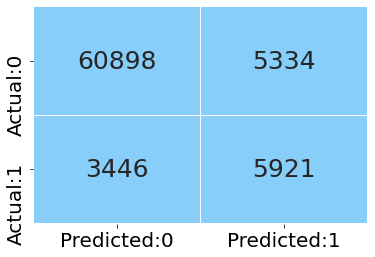

Roc Curve 

None


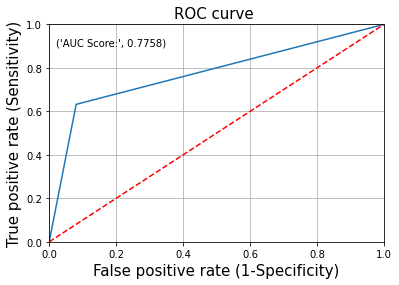

In [353]:
test_report_st = get_test_report_st(stack_model)

print(test_report_st)

In [223]:
Stack_Generalization = pd.Series({'Model_Name': "Stack Generlization (final est:gaussianNB)",
                          'Cohen_kappa_score':0.508,
                          'Accuracy':0.88,
                          'F1_score':0.57,
                           'Precision':0.53,
                            'Recall':0.63 })

# append the values to the result table
test_result_table = test_result_table.append(Stack_Generalization, ignore_index = True)

# print the result table
test_result_table

Model_Name  Cohen_kappa_score  \
0                         Logistic_Regression base           0.000000   
1           Logistic_Regression with Youdens index           0.029945   
2   Logistic_Regression with Youdens index and rfe           0.028463   
3                                    Decision Tree           0.473000   
4              Decision Tree with tuned parameters           0.064000   
5                                    Random Forest           0.505000   
6              Random forest with tuned parameters           0.508000   
7                                     Ada Boosting           0.000800   
8                                Gradient Boosting           0.001400   
9                                      XG Boosting           0.489000   
10      Stack Generlization (final est:gaussianNB)           0.508000   

    Accuracy  F1_score  Precision   Recall  
0   0.880000  0.000000   0.000000 0.000000  
1   0.470000  0.230000   0.140000 0.620000  
2   0.470000  0.230000   0.140000 0.620000  
3   0.880000  0.540000   0.520000 0.560000  
4   0.880000  0.080000   0.590000 0.040000  
5   0.900000  0.560000   0.600000 0.530000  
6   0.900000  0.560000   0.610000 0.530000  
7   0.880000  0.000000   0.560000 0.000000  
8   0.880000  0.000000   0.890000 0.000000  
9   0.900000  0.550000   0.600000 0.500000  
10  0.880000  0.570000   0.530000 0.630000

### Stack with Gradient Boosting

In [224]:
base_learner = [('DT',DecisionTreeClassifier() ),
               ('RF', RandomForestClassifier())]

stack = StackingClassifier(estimators = base_learner, final_estimator = GradientBoostingClassifier())
stack.fit(x_train_st, y_train_st)

StackingClassifier(estimators=[('DT', DecisionTreeClassifier()),
                               ('RF', RandomForestClassifier())],
                   final_estimator=GradientBoostingClassifier())

In [225]:
train_report_st = get_train_report_st(stack)

print(train_report_st)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95    154767
           1       0.61      0.68      0.64     21628

    accuracy                           0.91    176395
   macro avg       0.78      0.81      0.79    176395
weighted avg       0.91      0.91      0.91    176395

cohen_kappa_score: 0.588743717469727
None


              precision    recall  f1-score   support

           0       0.95      0.94      0.94     66232
           1       0.59      0.65      0.62      9367

    accuracy                           0.90     75599
   macro avg       0.77      0.79      0.78     75599
weighted avg       0.91      0.90      0.90     75599

cohen_kappa_score: 0.5637747850590525 

Confusion Matrix 



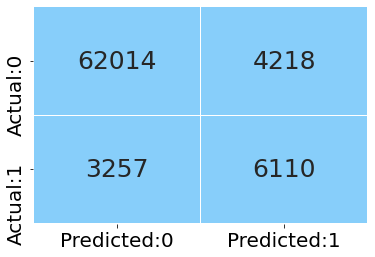

Roc Curve 

None


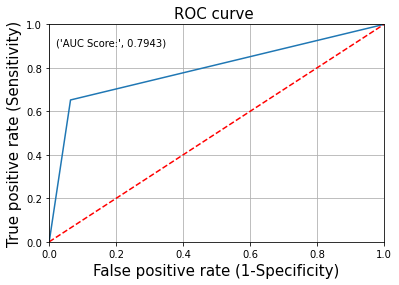

In [354]:
test_report_st = get_test_report_st(stack)

print(test_report_st)

In [230]:
stack_grad_boosting = pd.Series({'Model_Name': "stack with Gradient Boosting",
                         'Cohen_kappa_score':0.558,
                          'Accuracy':0.90,
                          'F1_score':0.61,
                           'Precision':0.59,
                            'Recall':0.64 })

# append the values to the result table
test_result_table = test_result_table.append(stack_grad_boosting, ignore_index = True)

# print the result table
test_result_table

Model_Name  Cohen_kappa_score  \
0                         Logistic_Regression base           0.000000   
1           Logistic_Regression with Youdens index           0.029945   
2   Logistic_Regression with Youdens index and rfe           0.028463   
3                                    Decision Tree           0.473000   
4              Decision Tree with tuned parameters           0.064000   
5                                    Random Forest           0.505000   
6              Random forest with tuned parameters           0.508000   
7                                     Ada Boosting           0.000800   
8                                Gradient Boosting           0.001400   
9                                      XG Boosting           0.489000   
10      Stack Generlization (final est:gaussianNB)           0.508000   
11                    stack with Gradient Boosting           0.558000   

    Accuracy  F1_score  Precision   Recall  
0   0.880000  0.000000   0.000000 0.000000  
1   0.470000  0.230000   0.140000 0.620000  
2   0.470000  0.230000   0.140000 0.620000  
3   0.880000  0.540000   0.520000 0.560000  
4   0.880000  0.080000   0.590000 0.040000  
5   0.900000  0.560000   0.600000 0.530000  
6   0.900000  0.560000   0.610000 0.530000  
7   0.880000  0.000000   0.560000 0.000000  
8   0.880000  0.000000   0.890000 0.000000  
9   0.900000  0.550000   0.600000 0.500000  
10  0.880000  0.570000   0.530000 0.630000  
11  0.900000  0.610000   0.590000 0.640000

### Stack with Ada Boosting

In [231]:
base_learner = [('DT',DecisionTreeClassifier() ),
               ('RF', RandomForestClassifier())]

stack_ada = StackingClassifier(estimators = base_learner, final_estimator = AdaBoostClassifier())
stack_ada.fit(x_train_st, y_train_st)

StackingClassifier(estimators=[('DT', DecisionTreeClassifier()),
                               ('RF', RandomForestClassifier())],
                   final_estimator=AdaBoostClassifier())

In [232]:
train_report_st = get_train_report_st(stack_ada)

print(train_report_st)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96    154767
           1       0.67      0.87      0.76     21628

    accuracy                           0.93    176395
   macro avg       0.82      0.91      0.86    176395
weighted avg       0.94      0.93      0.93    176395

cohen_kappa_score: 0.7166748181742758
None


              precision    recall  f1-score   support

           0       0.95      0.94      0.94     66232
           1       0.59      0.65      0.62      9367

    accuracy                           0.90     75599
   macro avg       0.77      0.79      0.78     75599
weighted avg       0.90      0.90      0.90     75599

cohen_kappa_score: 0.5593435243748015 

Confusion Matrix 



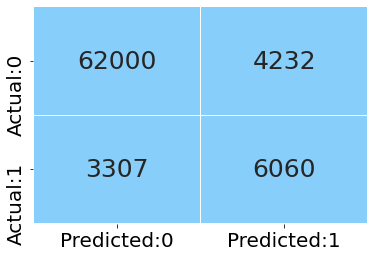

Roc Curve 

None


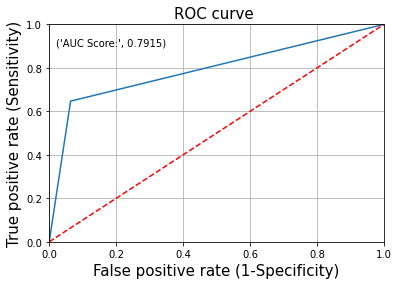

In [355]:
test_report_st = get_test_report_st(stack_ada)

print(test_report_st)

In [234]:
stack_ada_boosting = pd.Series({'Model_Name': "stack with Ada Boosting",
                         'Cohen_kappa_score':0.560,
                          'Accuracy':0.90,
                          'F1_score':0.62,
                           'Precision':0.59,
                            'Recall':0.65 })

# append the values to the result table
test_result_table = test_result_table.append(stack_ada_boosting, ignore_index = True)

# print the result table
test_result_table

Model_Name  Cohen_kappa_score  \
0                         Logistic_Regression base           0.000000   
1           Logistic_Regression with Youdens index           0.029945   
2   Logistic_Regression with Youdens index and rfe           0.028463   
3                                    Decision Tree           0.473000   
4              Decision Tree with tuned parameters           0.064000   
5                                    Random Forest           0.505000   
6              Random forest with tuned parameters           0.508000   
7                                     Ada Boosting           0.000800   
8                                Gradient Boosting           0.001400   
9                                      XG Boosting           0.489000   
10      Stack Generlization (final est:gaussianNB)           0.508000   
11                    stack with Gradient Boosting           0.558000   
12                         stack with Ada Boosting           0.560000   

    Accuracy  F1_score  Precision   Recall  
0   0.880000  0.000000   0.000000 0.000000  
1   0.470000  0.230000   0.140000 0.620000  
2   0.470000  0.230000   0.140000 0.620000  
3   0.880000  0.540000   0.520000 0.560000  
4   0.880000  0.080000   0.590000 0.040000  
5   0.900000  0.560000   0.600000 0.530000  
6   0.900000  0.560000   0.610000 0.530000  
7   0.880000  0.000000   0.560000 0.000000  
8   0.880000  0.000000   0.890000 0.000000  
9   0.900000  0.550000   0.600000 0.500000  
10  0.880000  0.570000   0.530000 0.630000  
11  0.900000  0.610000   0.590000 0.640000  
12  0.900000  0.620000   0.590000 0.650000

### Stack with XgB

In [235]:
base_learner = [('DT',DecisionTreeClassifier() ),
               ('RF', RandomForestClassifier())]

stack_xgb = StackingClassifier(estimators = base_learner, final_estimator = XGBClassifier())
stack_xgb.fit(x_train_st, y_train_st)

[15:33:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(estimators=[('DT', DecisionTreeClassifier()),
                               ('RF', RandomForestClassifier())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 enable_categorical=False,
                                                 gamma=None, gpu_id=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 min_child_weight=Non

In [236]:
train_report_st = get_train_report_st(stack_xgb)

print(test_report_st)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95    154767
           1       0.61      0.66      0.63     21628

    accuracy                           0.91    176395
   macro avg       0.78      0.80      0.79    176395
weighted avg       0.91      0.91      0.91    176395

cohen_kappa_score: 0.578400791803521
None


              precision    recall  f1-score   support

           0       0.95      0.94      0.94     66232
           1       0.59      0.62      0.60      9367

    accuracy                           0.90     75599
   macro avg       0.77      0.78      0.77     75599
weighted avg       0.90      0.90      0.90     75599

cohen_kappa_score: 0.5438041256698591 

Confusion Matrix 



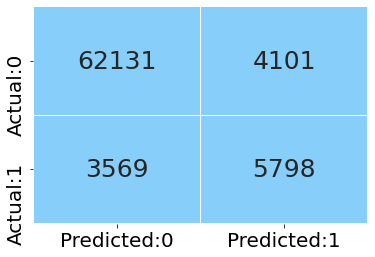

Roc Curve 

None


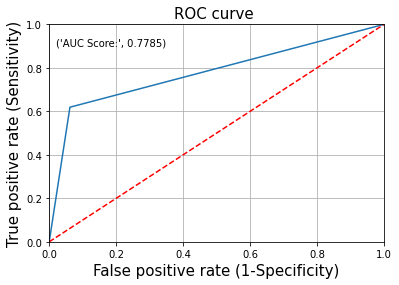

In [356]:
test_report_st = get_test_report_st(stack_xgb)

print(test_report_st)

In [238]:
stack_xg_boosting = pd.Series({'Model_Name': "stack with XG Boosting",
                         'Cohen_kappa_score':0.544,
                          'Accuracy':0.90,
                          'F1_score':0.60,
                           'Precision':0.59,
                            'Recall':0.62})

# append the values to the result table
test_result_table = test_result_table.append(stack_xg_boosting, ignore_index = True)

# print the result table
test_result_table

Model_Name  Cohen_kappa_score  \
0                         Logistic_Regression base           0.000000   
1           Logistic_Regression with Youdens index           0.029945   
2   Logistic_Regression with Youdens index and rfe           0.028463   
3                                    Decision Tree           0.473000   
4              Decision Tree with tuned parameters           0.064000   
5                                    Random Forest           0.505000   
6              Random forest with tuned parameters           0.508000   
7                                     Ada Boosting           0.000800   
8                                Gradient Boosting           0.001400   
9                                      XG Boosting           0.489000   
10      Stack Generlization (final est:gaussianNB)           0.508000   
11                    stack with Gradient Boosting           0.558000   
12                         stack with Ada Boosting           0.560000   
13                          stack with XG Boosting           0.544000   

    Accuracy  F1_score  Precision   Recall  
0   0.880000  0.000000   0.000000 0.000000  
1   0.470000  0.230000   0.140000 0.620000  
2   0.470000  0.230000   0.140000 0.620000  
3   0.880000  0.540000   0.520000 0.560000  
4   0.880000  0.080000   0.590000 0.040000  
5   0.900000  0.560000   0.600000 0.530000  
6   0.900000  0.560000   0.610000 0.530000  
7   0.880000  0.000000   0.560000 0.000000  
8   0.880000  0.000000   0.890000 0.000000  
9   0.900000  0.550000   0.600000 0.500000  
10  0.880000  0.570000   0.530000 0.630000  
11  0.900000  0.610000   0.590000 0.640000  
12  0.900000  0.620000   0.590000 0.650000  
13  0.900000  0.600000   0.590000 0.620000

###  stack with xgb and Tuned parameters

In [239]:
base_learner = [('DT',DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 9,
                                  max_features = 'sqrt',
                                  min_samples_split = 2,
                                  random_state = 10)) ,
                 ('RF', RandomForestClassifier(criterion = 'entropy', 
                                  n_estimators = 70))]

stack = StackingClassifier(estimators = base_learner, final_estimator = XGBClassifier())
stack.fit(x_train_st, y_train_st)

[15:39:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(estimators=[('DT',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=9,
                                                       max_features='sqrt',
                                                       random_state=10)),
                               ('RF',
                                RandomForestClassifier(criterion='entropy',
                                                       n_estimators=70))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 enable_categorical=False,
                                                 g...
                                                 inte

In [240]:
train_report_st = get_train_report_st(stack)

print(train_report_st)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96    154767
           1       0.68      0.78      0.73     21628

    accuracy                           0.93    176395
   macro avg       0.83      0.86      0.84    176395
weighted avg       0.93      0.93      0.93    176395

cohen_kappa_score: 0.6881391435894193
None


              precision    recall  f1-score   support

           0       0.95      0.94      0.94     66232
           1       0.59      0.65      0.62      9367

    accuracy                           0.90     75599
   macro avg       0.77      0.79      0.78     75599
weighted avg       0.91      0.90      0.90     75599

cohen_kappa_score: 0.5637747850590525 

Confusion Matrix 



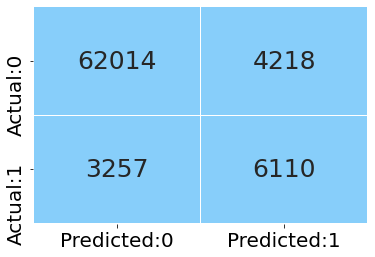

Roc Curve 

None


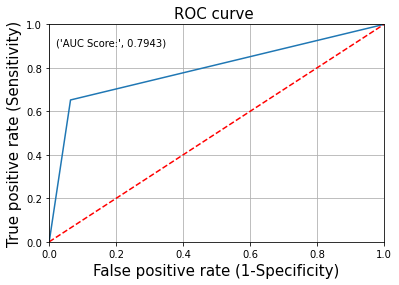

In [357]:
test_report_st = get_test_report_st(stack)
print(test_report_st)

In [250]:
stack__xgb_tuned_parameter = pd.Series({'Model_Name': "stack with xgb and tuned parameter",
                         'Cohen_kappa_score':0.503,
                          'Accuracy':0.90,
                          'F1_score':0.56,
                           'Precision':0.59,
                            'Recall':0.53})

# append the values to the result table
test_result_table = test_result_table.append(stack__xgb_tuned_parameter, ignore_index = True)

# print the result table
test_result_table

Model_Name  Cohen_kappa_score  \
0                         Logistic_Regression base           0.000000   
1           Logistic_Regression with Youdens index           0.029945   
2   Logistic_Regression with Youdens index and rfe           0.028463   
3                                    Decision Tree           0.473000   
4              Decision Tree with tuned parameters           0.064000   
5                                    Random Forest           0.505000   
6              Random forest with tuned parameters           0.508000   
7                                     Ada Boosting           0.000800   
8                                Gradient Boosting           0.001400   
9                                      XG Boosting           0.489000   
10      Stack Generlization (final est:gaussianNB)           0.508000   
11                    stack with Gradient Boosting           0.558000   
12                         stack with Ada Boosting           0.560000   
13                          stack with XG Boosting           0.544000   
14              stack with xgb and tuned parameter           0.503000   

    Accuracy  F1_score  Precision   Recall  
0   0.880000  0.000000   0.000000 0.000000  
1   0.470000  0.230000   0.140000 0.620000  
2   0.470000  0.230000   0.140000 0.620000  
3   0.880000  0.540000   0.520000 0.560000  
4   0.880000  0.080000   0.590000 0.040000  
5   0.900000  0.560000   0.600000 0.530000  
6   0.900000  0.560000   0.610000 0.530000  
7   0.880000  0.000000   0.560000 0.000000  
8   0.880000  0.000000   0.890000 0.000000  
9   0.900000  0.550000   0.600000 0.500000  
10  0.880000  0.570000   0.530000 0.630000  
11  0.900000  0.610000   0.590000 0.640000  
12  0.900000  0.620000   0.590000 0.650000  
13  0.900000  0.600000   0.590000 0.620000  
14  0.900000  0.560000   0.590000 0.530000

In [251]:
base_learner = [('DT',DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 9,
                                  max_features = 'sqrt',
                                  min_samples_split = 2,
                                  random_state = 10)) ,
                 ('RF', RandomForestClassifier(criterion = 'entropy', 
                                  n_estimators = 70))]

stack = StackingClassifier(estimators = base_learner, final_estimator = GradientBoostingClassifier())
stack.fit(x_train_st, y_train_st)

StackingClassifier(estimators=[('DT',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=9,
                                                       max_features='sqrt',
                                                       random_state=10)),
                               ('RF',
                                RandomForestClassifier(criterion='entropy',
                                                       n_estimators=70))],
                   final_estimator=GradientBoostingClassifier())

In [252]:
train_report_st = get_train_report_st(stack)

print(train_report_st)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96    154767
           1       0.68      0.89      0.77     21628

    accuracy                           0.94    176395
   macro avg       0.83      0.92      0.87    176395
weighted avg       0.95      0.94      0.94    176395

cohen_kappa_score: 0.7373771928901349
None


              precision    recall  f1-score   support

           0       0.95      0.94      0.94     66232
           1       0.59      0.65      0.62      9367

    accuracy                           0.90     75599
   macro avg       0.77      0.79      0.78     75599
weighted avg       0.91      0.90      0.90     75599

cohen_kappa_score: 0.5637747850590525 

Confusion Matrix 



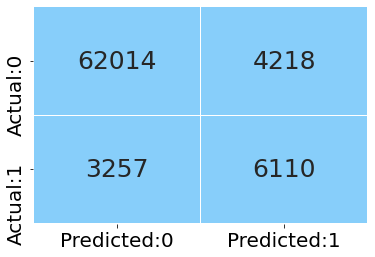

Roc Curve 

None


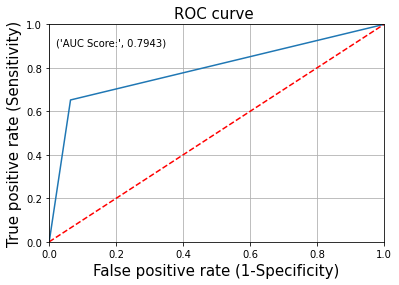

In [358]:
test_report_st = get_test_report_st(stack)
print(test_report_st)

In [254]:
stack_gb_tuned_parameter = pd.Series({'Model_Name': "stack with Gradient Boosting and tuned parameter",
                         'Cohen_kappa_score':0.552,
                          'Accuracy':0.90,
                          'F1_score':0.61,
                           'Precision':0.59,
                            'Recall':0.63})

# append the values to the result table
test_result_table = test_result_table.append(stack_gb_tuned_parameter, ignore_index = True)

# print the result table
test_result_table

Model_Name  Cohen_kappa_score  \
0                           Logistic_Regression base           0.000000   
1             Logistic_Regression with Youdens index           0.029945   
2     Logistic_Regression with Youdens index and rfe           0.028463   
3                                      Decision Tree           0.473000   
4                Decision Tree with tuned parameters           0.064000   
5                                      Random Forest           0.505000   
6                Random forest with tuned parameters           0.508000   
7                                       Ada Boosting           0.000800   
8                                  Gradient Boosting           0.001400   
9                                        XG Boosting           0.489000   
10        Stack Generlization (final est:gaussianNB)           0.508000   
11                      stack with Gradient Boosting           0.558000   
12                           stack with Ada Boosting           0.560000   
13                            stack with XG Boosting           0.544000   
14                stack with xgb and tuned parameter           0.503000   
15  stack with Gradient Boosting and tuned parameter           0.552000   

    Accuracy  F1_score  Precision   Recall  
0   0.880000  0.000000   0.000000 0.000000  
1   0.470000  0.230000   0.140000 0.620000  
2   0.470000  0.230000   0.140000 0.620000  
3   0.880000  0.540000   0.520000 0.560000  
4   0.880000  0.080000   0.590000 0.040000  
5   0.900000  0.560000   0.600000 0.530000  
6   0.900000  0.560000   0.610000 0.530000  
7   0.880000  0.000000   0.560000 0.000000  
8   0.880000  0.000000   0.890000 0.000000  
9   0.900000  0.550000   0.600000 0.500000  
10  0.880000  0.570000   0.530000 0.630000  
11  0.900000  0.610000   0.590000 0.640000  
12  0.900000  0.620000   0.590000 0.650000  
13  0.900000  0.600000   0.590000 0.620000  
14  0.900000  0.560000   0.590000 0.530000  
15  0.900000  0.610000   0.590000 0.630000

In [255]:
base_learner = [('DT',DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 9,
                                  max_features = 'sqrt',
                                  min_samples_split = 2,
                                  random_state = 10)) ,
                 ('RF', RandomForestClassifier(criterion = 'entropy', 
                                  n_estimators = 70))]

stack = StackingClassifier(estimators = base_learner, final_estimator = AdaBoostClassifier())
stack.fit(x_train_st, y_train_st)

StackingClassifier(estimators=[('DT',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=9,
                                                       max_features='sqrt',
                                                       random_state=10)),
                               ('RF',
                                RandomForestClassifier(criterion='entropy',
                                                       n_estimators=70))],
                   final_estimator=AdaBoostClassifier())

In [256]:
train_report_st = get_train_report_st(stack)

print(train_report_st)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96    154767
           1       0.69      0.89      0.77     21628

    accuracy                           0.94    176395
   macro avg       0.83      0.92      0.87    176395
weighted avg       0.95      0.94      0.94    176395

cohen_kappa_score: 0.7374374548406445
None


              precision    recall  f1-score   support

           0       0.95      0.94      0.94     66232
           1       0.59      0.65      0.62      9367

    accuracy                           0.90     75599
   macro avg       0.77      0.79      0.78     75599
weighted avg       0.91      0.90      0.90     75599

cohen_kappa_score: 0.5637747850590525 

Confusion Matrix 



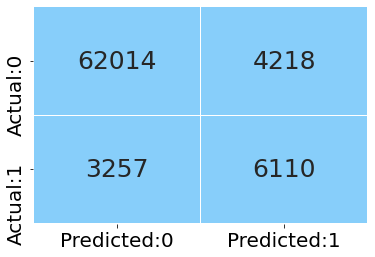

Roc Curve 

None


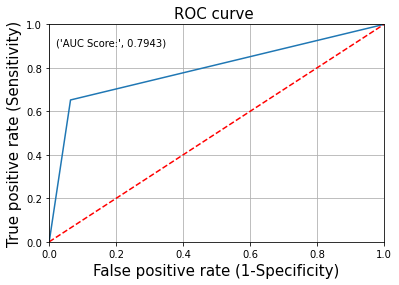

In [359]:
test_report_st = get_test_report_st(stack)
print(test_report_st)

In [260]:
stack_ab_tuned_parameter = pd.Series({'Model_Name': "stack with Ada Boosting and tuned parameter",
                         'Cohen_kappa_score':0.547,
                          'Accuracy':0.90,
                          'F1_score':0.60,
                           'Precision':0.59,
                            'Recall':0.62})

# append the values to the result table
test_result_table = test_result_table.append(stack_ab_tuned_parameter, ignore_index = True)

# print the result table
test_result_table

Model_Name  Cohen_kappa_score  \
0                           Logistic_Regression base           0.000000   
1             Logistic_Regression with Youdens index           0.029945   
2     Logistic_Regression with Youdens index and rfe           0.028463   
3                                      Decision Tree           0.473000   
4                Decision Tree with tuned parameters           0.064000   
5                                      Random Forest           0.505000   
6                Random forest with tuned parameters           0.508000   
7                                       Ada Boosting           0.000800   
8                                  Gradient Boosting           0.001400   
9                                        XG Boosting           0.489000   
10        Stack Generlization (final est:gaussianNB)           0.508000   
11                      stack with Gradient Boosting           0.558000   
12                           stack with Ada Boosting           0.560000   
13                            stack with XG Boosting           0.544000   
14                stack with xgb and tuned parameter           0.503000   
15  stack with Gradient Boosting and tuned parameter           0.552000   
16       stack with Ada Boosting and tuned parameter           0.547000   

    Accuracy  F1_score  Precision   Recall  
0   0.880000  0.000000   0.000000 0.000000  
1   0.470000  0.230000   0.140000 0.620000  
2   0.470000  0.230000   0.140000 0.620000  
3   0.880000  0.540000   0.520000 0.560000  
4   0.880000  0.080000   0.590000 0.040000  
5   0.900000  0.560000   0.600000 0.530000  
6   0.900000  0.560000   0.610000 0.530000  
7   0.880000  0.000000   0.560000 0.000000  
8   0.880000  0.000000   0.890000 0.000000  
9   0.900000  0.550000   0.600000 0.500000  
10  0.880000  0.570000   0.530000 0.630000  
11  0.900000  0.610000   0.590000 0.640000  
12  0.900000  0.620000   0.590000 0.650000  
13  0.900000  0.600000   0.590000 0.620000  
14  0.900000  0.560000   0.590000 0.530000  
15  0.900000  0.610000   0.590000 0.630000  
16  0.900000  0.600000   0.590000 0.620000

### stacking with balanced weight and boosting Techniques

In [264]:
base_learner = [('DT',DecisionTreeClassifier(class_weight='balanced')),
               ('RF', RandomForestClassifier(class_weight='balanced'))]

stack_ada_bal = StackingClassifier(estimators = base_learner, final_estimator = AdaBoostClassifier())
stack_ada_bal.fit(x_train_st, y_train_st)

StackingClassifier(estimators=[('DT',
                                DecisionTreeClassifier(class_weight='balanced')),
                               ('RF',
                                RandomForestClassifier(class_weight='balanced'))],
                   final_estimator=AdaBoostClassifier())

In [265]:
train_report_st = get_train_report_st(stack_ada_bal)

print(train_report_st)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95    154767
           1       0.60      0.68      0.64     21628

    accuracy                           0.91    176395
   macro avg       0.78      0.81      0.79    176395
weighted avg       0.91      0.91      0.91    176395

cohen_kappa_score: 0.5876578371976842
None


              precision    recall  f1-score   support

           0       0.95      0.94      0.94     66232
           1       0.59      0.66      0.62      9367

    accuracy                           0.90     75599
   macro avg       0.77      0.80      0.78     75599
weighted avg       0.91      0.90      0.90     75599

cohen_kappa_score: 0.5642780541757696 

Confusion Matrix 



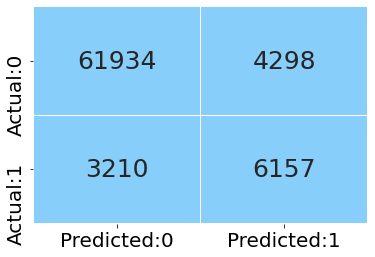

Roc Curve 

None


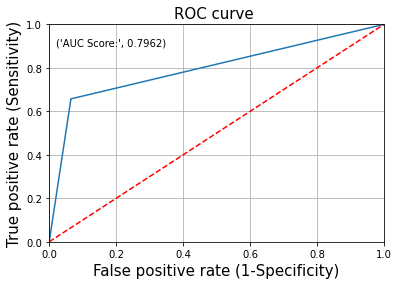

In [360]:
test_report_st = get_test_report_st(stack_ada_bal)

print(test_report_st)

In [267]:
stack_ab_bal = pd.Series({'Model_Name': "stack with Ada Boosting and balancing",
                         'Cohen_kappa_score':0.564,
                          'Accuracy':0.90,
                          'F1_score':0.62,
                           'Precision':0.59,
                            'Recall':0.66})

# append the values to the result table
test_result_table = test_result_table.append(stack_ab_bal, ignore_index = True)

# print the result table
test_result_table

Model_Name  Cohen_kappa_score  \
0                           Logistic_Regression base           0.000000   
1             Logistic_Regression with Youdens index           0.029945   
2     Logistic_Regression with Youdens index and rfe           0.028463   
3                                      Decision Tree           0.473000   
4                Decision Tree with tuned parameters           0.064000   
5                                      Random Forest           0.505000   
6                Random forest with tuned parameters           0.508000   
7                                       Ada Boosting           0.000800   
8                                  Gradient Boosting           0.001400   
9                                        XG Boosting           0.489000   
10        Stack Generlization (final est:gaussianNB)           0.508000   
11                      stack with Gradient Boosting           0.558000   
12                           stack with Ada Boosting           0.560000   
13                            stack with XG Boosting           0.544000   
14                stack with xgb and tuned parameter           0.503000   
15  stack with Gradient Boosting and tuned parameter           0.552000   
16       stack with Ada Boosting and tuned parameter           0.547000   
17             stack with Ada Boosting and balancing           0.564000   

    Accuracy  F1_score  Precision   Recall  
0   0.880000  0.000000   0.000000 0.000000  
1   0.470000  0.230000   0.140000 0.620000  
2   0.470000  0.230000   0.140000 0.620000  
3   0.880000  0.540000   0.520000 0.560000  
4   0.880000  0.080000   0.590000 0.040000  
5   0.900000  0.560000   0.600000 0.530000  
6   0.900000  0.560000   0.610000 0.530000  
7   0.880000  0.000000   0.560000 0.000000  
8   0.880000  0.000000   0.890000 0.000000  
9   0.900000  0.550000   0.600000 0.500000  
10  0.880000  0.570000   0.530000 0.630000  
11  0.900000  0.610000   0.590000 0.640000  
12  0.900000  0.620000   0.590000 0.650000  
13  0.900000  0.600000   0.590000 0.620000  
14  0.900000  0.560000   0.590000 0.530000  
15  0.900000  0.610000   0.590000 0.630000  
16  0.900000  0.600000   0.590000 0.620000  
17  0.900000  0.620000   0.590000 0.660000

In [368]:
base_learner = [('DT',DecisionTreeClassifier(class_weight='balanced')),
               ('RF', RandomForestClassifier(class_weight='balanced'))]

stack_xgb_bal = StackingClassifier(estimators = base_learner, final_estimator = XGBClassifier())
stack_xgb_bal.fit(x_train_st, y_train_st)

[18:05:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(estimators=[('DT',
                                DecisionTreeClassifier(class_weight='balanced')),
                               ('RF',
                                RandomForestClassifier(class_weight='balanced'))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 enable_categorical=False,
                                                 gamma=None, gpu_id=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_delta_step=None,
                        

In [369]:
train_report_st = get_train_report_st(stack_xgb_bal)

print(train_report_st)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95    154767
           1       0.60      0.64      0.62     21628

    accuracy                           0.90    176395
   macro avg       0.78      0.79      0.78    176395
weighted avg       0.91      0.90      0.91    176395

cohen_kappa_score: 0.567878079670072
None


              precision    recall  f1-score   support

           0       0.95      0.94      0.94     66232
           1       0.59      0.62      0.60      9367

    accuracy                           0.90     75599
   macro avg       0.77      0.78      0.77     75599
weighted avg       0.90      0.90      0.90     75599

cohen_kappa_score: 0.545987413953605 

Confusion Matrix 



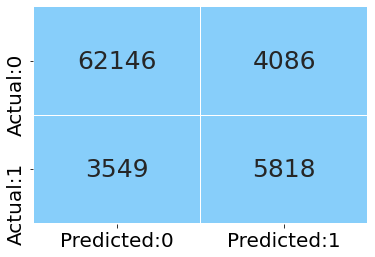

Roc Curve 

None


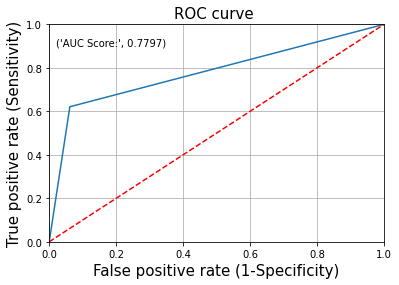

In [370]:
test_report_st = get_test_report_st(stack_xgb_bal)

print(test_report_st)

In [271]:
stack_xgb_bal = pd.Series({'Model_Name': "stack with XG Boosting and balancing",
                         'Cohen_kappa_score':0.543,
                          'Accuracy':0.90,
                          'F1_score':0.60,
                           'Precision':0.58,
                            'Recall':0.62})

# append the values to the result table
test_result_table = test_result_table.append(stack_xgb_bal, ignore_index = True)

# print the result table
test_result_table

Model_Name  Cohen_kappa_score  \
0                           Logistic_Regression base           0.000000   
1             Logistic_Regression with Youdens index           0.029945   
2     Logistic_Regression with Youdens index and rfe           0.028463   
3                                      Decision Tree           0.473000   
4                Decision Tree with tuned parameters           0.064000   
5                                      Random Forest           0.505000   
6                Random forest with tuned parameters           0.508000   
7                                       Ada Boosting           0.000800   
8                                  Gradient Boosting           0.001400   
9                                        XG Boosting           0.489000   
10        Stack Generlization (final est:gaussianNB)           0.508000   
11                      stack with Gradient Boosting           0.558000   
12                           stack with Ada Boosting           0.560000   
13                            stack with XG Boosting           0.544000   
14                stack with xgb and tuned parameter           0.503000   
15  stack with Gradient Boosting and tuned parameter           0.552000   
16       stack with Ada Boosting and tuned parameter           0.547000   
17             stack with Ada Boosting and balancing           0.564000   
18              stack with XG Boosting and balancing           0.543000   

    Accuracy  F1_score  Precision   Recall  
0   0.880000  0.000000   0.000000 0.000000  
1   0.470000  0.230000   0.140000 0.620000  
2   0.470000  0.230000   0.140000 0.620000  
3   0.880000  0.540000   0.520000 0.560000  
4   0.880000  0.080000   0.590000 0.040000  
5   0.900000  0.560000   0.600000 0.530000  
6   0.900000  0.560000   0.610000 0.530000  
7   0.880000  0.000000   0.560000 0.000000  
8   0.880000  0.000000   0.890000 0.000000  
9   0.900000  0.550000   0.600000 0.500000  
10  0.880000  0.570000   0.530000 0.630000  
11  0.900000  0.610000   0.590000 0.640000  
12  0.900000  0.620000   0.590000 0.650000  
13  0.900000  0.600000   0.590000 0.620000  
14  0.900000  0.560000   0.590000 0.530000  
15  0.900000  0.610000   0.590000 0.630000  
16  0.900000  0.600000   0.590000 0.620000  
17  0.900000  0.620000   0.590000 0.660000  
18  0.900000  0.600000   0.580000 0.620000

In [285]:
base_learner = [('DT',DecisionTreeClassifier(class_weight='balanced')),
               ('RF', RandomForestClassifier(class_weight='balanced'))]

stack_gb_bal = StackingClassifier(estimators = base_learner, final_estimator = GradientBoostingClassifier())
stack_gb_bal_model=stack_gb_bal.fit(x_train_st, y_train_st)

In [273]:
train_report_st = get_train_report_st(stack_gb_bal)

print(train_report_st)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95    154767
           1       0.60      0.69      0.64     21628

    accuracy                           0.91    176395
   macro avg       0.78      0.81      0.79    176395
weighted avg       0.91      0.91      0.91    176395

cohen_kappa_score: 0.5884856087052589
None


              precision    recall  f1-score   support

           0       0.95      0.93      0.94     66232
           1       0.59      0.67      0.63      9367

    accuracy                           0.90     75599
   macro avg       0.77      0.80      0.78     75599
weighted avg       0.91      0.90      0.90     75599

cohen_kappa_score: 0.5686649644129671 

Confusion Matrix 



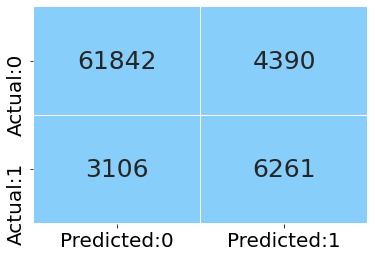

Roc Curve 

None


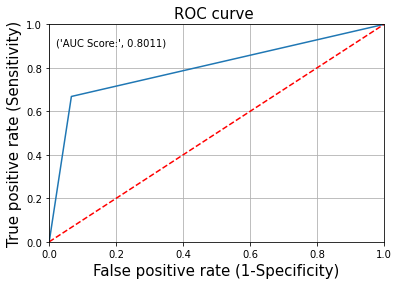

In [366]:
test_report_st = get_test_report_st(stack_gb_bal)

print(test_report_st)

In [275]:
stack_gb_bal = pd.Series({'Model_Name': "stack with Gradient Boosting and balancing",
                         'Cohen_kappa_score':0.568,
                          'Accuracy':0.90,
                          'F1_score':0.62,
                           'Precision':0.59,
                            'Recall':0.67})

# append the values to the result table
test_result_table = test_result_table.append(stack_gb_bal, ignore_index = True)

# print the result table
test_result_table

Model_Name  Cohen_kappa_score  \
0                           Logistic_Regression base           0.000000   
1             Logistic_Regression with Youdens index           0.029945   
2     Logistic_Regression with Youdens index and rfe           0.028463   
3                                      Decision Tree           0.473000   
4                Decision Tree with tuned parameters           0.064000   
5                                      Random Forest           0.505000   
6                Random forest with tuned parameters           0.508000   
7                                       Ada Boosting           0.000800   
8                                  Gradient Boosting           0.001400   
9                                        XG Boosting           0.489000   
10        Stack Generlization (final est:gaussianNB)           0.508000   
11                      stack with Gradient Boosting           0.558000   
12                           stack with Ada Boosting           0.560000   
13                            stack with XG Boosting           0.544000   
14                stack with xgb and tuned parameter           0.503000   
15  stack with Gradient Boosting and tuned parameter           0.552000   
16       stack with Ada Boosting and tuned parameter           0.547000   
17             stack with Ada Boosting and balancing           0.564000   
18              stack with XG Boosting and balancing           0.543000   
19        stack with Gradient Boosting and balancing           0.568000   

    Accuracy  F1_score  Precision   Recall  
0   0.880000  0.000000   0.000000 0.000000  
1   0.470000  0.230000   0.140000 0.620000  
2   0.470000  0.230000   0.140000 0.620000  
3   0.880000  0.540000   0.520000 0.560000  
4   0.880000  0.080000   0.590000 0.040000  
5   0.900000  0.560000   0.600000 0.530000  
6   0.900000  0.560000   0.610000 0.530000  
7   0.880000  0.000000   0.560000 0.000000  
8   0.880000  0.000000   0.890000 0.000000  
9   0.900000  0.550000   0.600000 0.500000  
10  0.880000  0.570000   0.530000 0.630000  
11  0.900000  0.610000   0.590000 0.640000  
12  0.900000  0.620000   0.590000 0.650000  
13  0.900000  0.600000   0.590000 0.620000  
14  0.900000  0.560000   0.590000 0.530000  
15  0.900000  0.610000   0.590000 0.630000  
16  0.900000  0.600000   0.590000 0.620000  
17  0.900000  0.620000   0.590000 0.660000  
18  0.900000  0.600000   0.580000 0.620000  
19  0.900000  0.620000   0.590000 0.670000

In [ ]:
# stack with gradient boosting with balancing

In [279]:
base_learner = [('DT',DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 9,
                                  max_features = 'sqrt',
                                  min_samples_split = 2,
                                  class_weight='balanced',
                                  random_state = 10)),
                 ('RF', RandomForestClassifier(criterion = 'entropy', 
                                               class_weight='balanced',
                                               n_estimators = 70))]

stack = StackingClassifier(estimators = base_learner, final_estimator = GradientBoostingClassifier())
stack.fit(x_train_st, y_train_st)

StackingClassifier(estimators=[('DT',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       criterion='entropy',
                                                       max_depth=9,
                                                       max_features='sqrt',
                                                       random_state=10)),
                               ('RF',
                                RandomForestClassifier(class_weight='balanced',
                                                       criterion='entropy',
                                                       n_estimators=70))],
                   final_estimator=GradientBoostingClassifier())

In [280]:
train_report_st = get_train_report_st(stack)

print(train_report_st)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95    154767
           1       0.61      0.68      0.64     21628

    accuracy                           0.91    176395
   macro avg       0.78      0.81      0.79    176395
weighted avg       0.91      0.91      0.91    176395

cohen_kappa_score: 0.5851527644481316
None


              precision    recall  f1-score   support

           0       0.95      0.94      0.94     66232
           1       0.59      0.65      0.62      9367

    accuracy                           0.90     75599
   macro avg       0.77      0.79      0.78     75599
weighted avg       0.91      0.90      0.90     75599

cohen_kappa_score: 0.5637747850590525 

Confusion Matrix 



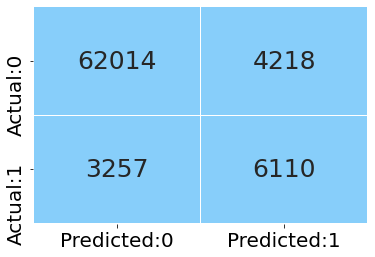

Roc Curve 

None


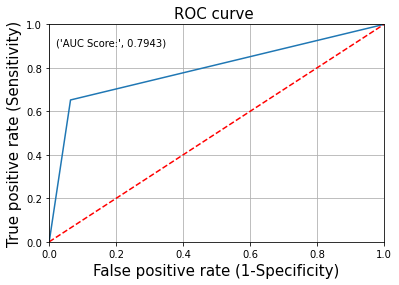

In [367]:
test_report_st = get_test_report_st(stack)

print(test_report_st)

In [282]:
stack_gb_bal_tune = pd.Series({'Model_Name': "stack with Gradient Boosting,tuned parameters and balancing",
                         'Cohen_kappa_score':0.564,
                          'Accuracy':0.90,
                          'F1_score':0.62,
                           'Precision':0.59,
                            'Recall':0.65})

# append the values to the result table
test_result_table = test_result_table.append(stack_gb_bal_tune, ignore_index = True)

# print the result table
test_result_table

Model_Name  Cohen_kappa_score  \
0                            Logistic_Regression base           0.000000   
1              Logistic_Regression with Youdens index           0.029945   
2      Logistic_Regression with Youdens index and rfe           0.028463   
3                                       Decision Tree           0.473000   
4                 Decision Tree with tuned parameters           0.064000   
5                                       Random Forest           0.505000   
6                 Random forest with tuned parameters           0.508000   
7                                        Ada Boosting           0.000800   
8                                   Gradient Boosting           0.001400   
9                                         XG Boosting           0.489000   
10         Stack Generlization (final est:gaussianNB)           0.508000   
11                       stack with Gradient Boosting           0.558000   
12                            stack with Ada Boosting           0.560000   
13                             stack with XG Boosting           0.544000   
14                 stack with xgb and tuned parameter           0.503000   
15   stack with Gradient Boosting and tuned parameter           0.552000   
16        stack with Ada Boosting and tuned parameter           0.547000   
17              stack with Ada Boosting and balancing           0.564000   
18               stack with XG Boosting and balancing           0.543000   
19         stack with Gradient Boosting and balancing           0.568000   
20  stack with Gradient Boosting,tuned parameters ...           0.564000   

    Accuracy  F1_score  Precision   Recall  
0   0.880000  0.000000   0.000000 0.000000  
1   0.470000  0.230000   0.140000 0.620000  
2   0.470000  0.230000   0.140000 0.620000  
3   0.880000  0.540000   0.520000 0.560000  
4   0.880000  0.080000   0.590000 0.040000  
5   0.900000  0.560000   0.600000 0.530000  
6   0.900000  0.560000   0.610000 0.530000  
7   0.880000  0.000000   0.560000 0.000000  
8   0.880000  0.000000   0.890000 0.000000  
9   0.900000  0.550000   0.600000 0.500000  
10  0.880000  0.570000   0.530000 0.630000  
11  0.900000  0.610000   0.590000 0.640000  
12  0.900000  0.620000   0.590000 0.650000  
13  0.900000  0.600000   0.590000 0.620000  
14  0.900000  0.560000   0.590000 0.530000  
15  0.900000  0.610000   0.590000 0.630000  
16  0.900000  0.600000   0.590000 0.620000  
17  0.900000  0.620000   0.590000 0.660000  
18  0.900000  0.600000   0.580000 0.620000  
19  0.900000  0.620000   0.590000 0.670000  
20  0.900000  0.620000   0.590000 0.650000

# Feature importance

In [ ]:
# feature importace with random forest model

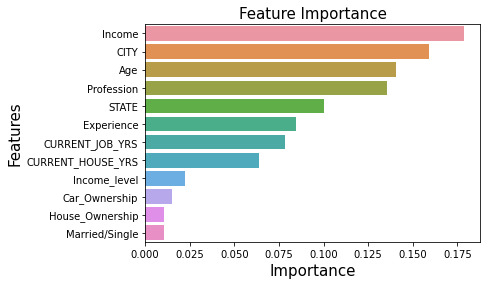

In [286]:
important_features = pd.DataFrame({'Features': x_train_st.columns, 
                                   'Importance': rf_model.feature_importances_})


important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)


plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

In [ ]:
######################## end ##############################